
## Problem statement: 
   
   A financial institution wants to develop a loan default prediction model to assess the risk of loan applicants defaulting on their loans. The institution has collected a dataset containing various features related to loan applications and historical loan outcomes. The goal is to build a machine learning model that can accurately predict the likelihood of loan default.






# Dataset Description:



The dataset consists of the following features:

ID: Unique identifier for each loan application.

year: Year of the loan application.

loan_limit: The maximum loan amount approved for the applicant.

Gender: Gender of the loan applicant.

approv_in_adv: Number of days the loan was approved in advance.

loan_type: Type of loan applied for.

loan_purpose: Purpose for which the loan is requested.

Credit_Worthiness: Assessment of the applicant's creditworthiness.

open_credit: Number of open credit lines.

business_or_commercial: Indicator whether the loan is for business or commercial purposes.

loan_amount: The actual loan amount approved.

rate_of_interest: Interest rate on the loan.

Interest_rate_spread: Difference between the interest rate and a benchmark rate.

Upfront_charges: Any upfront charges associated with the loan.

term: Loan term in months.

Neg_ammortization: Indicator of negative amortization (increasing loan balance over time).

interest_only: Indicator of interest-only payments.

lump_sum_payment: Indicator of lump sum payment requirements.

property_value: Value of the property being financed.

construction_type: Type of construction for the property.

occupancy_type: Occupancy type of the property.

Secured_by: Security provided for the loan.

total_units: Total number of units in the property.

income: Applicant's income.

credit_type: Type of credit.

Credit_Score: Credit score of the applicant.

co-applicant_credit_type: Credit type of the co-applicant.

age: Age of the applicant.

submission_of_application: Date of loan application submission.

LTV: Loan-to-value ratio.

Region: Geographic region of the loan application.

Security_Type: Type of security for the loan.

Status: Loan status (default or non-default).

dtir1: Debt-to-income ratio.

Target variable: Status (default or non-default).

# Import the libraries

In [1]:
import pandas as pd # Dataframes
import numpy as np
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.preprocessing import OneHotEncoder # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import missingno as msno # Visualizing null values
from sklearn.impute import KNNImputer # Filling in null values for numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Dinesh\Downloads\Loan_Default.csv")
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [4]:
df.shape

(148670, 34)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [5]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

Insights from the output:

The column "loan_limit" has 3344 missing values.

The column "approv_in_adv" has 908 missing values.

The column "loan_purpose" has 134 missing values.

The column "rate_of_interest" has 36439 missing values.

The column "Interest_rate_spread" has 36639 missing 
values.

The column "Upfront_charges" has 39642 missing values.

The column "term" has 41 missing values.

The column "Neg_ammortization" has 121 missing values.

The column "property_value" has 15098 missing values.

The column "income" has 9150 missing values.

The column "age" has 200 missing values.

The column "submission_of_application" has 200 missing values.

The column "LTV" has 15098 missing values.

The column "dtir1" has 24121 missing values.

By analyzing the missing values, you can gain insights into the data quality and determine if any data preprocessing steps, such as imputation or removal of missing values, are required before performing further analysis or modeling.






In [6]:
from matplotlib.pyplot import Figure
import matplotlib.pyplot as plt

In [7]:
df.duplicated().sum()

0

There is no duplicated value in  this dataset

In [8]:

import re



# Define a function to extract the lower bound from the age range
def extract_age_lower_bound(age_range):
    match = re.match(r'^(\d+)-\d+$', str(age_range))
    if match:
        return int(match.group(1))
    else:
        return None

# Apply the function to extract the lower bound of the age range
df['age'] = df['age'].apply(extract_age_lower_bound)

# Convert the column to integer type
df['age'] = df['age'].astype('Int64')

# Verify the updated data type
print(df.dtypes)


ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

The age column shows in catecorigal variable.

The 'age' column is then converted to the 'Int64' integer type, which supports nullable values.

After executing the code, you can verify the updated data type of the 'age' column by printing the 'df.dtypes'.

In [9]:
df.isnull().sum()/df.shape[0]*100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score             

This output provide an overview of the completeness of data in each column. It helps identify the columns with a significant number of missing values, which can be further investigated and addressed during data preprocessing or analysis.

In [10]:
def missingval(df):
    missvalcount=df.isnull().sum()
    missvalpercent=df.isnull().sum()/df.shape[0]*100
    newdf=pd.concat([missvalcount,missvalpercent],axis=1)
    newdf1=newdf.rename(columns={0:"missvalcount",1:"missvalpercent(%)"})
    newdf1=newdf1[newdf1["missvalcount"]!=0].sort_values(by="missvalcount",ascending=False)
    return newdf1

In [11]:
missingval(df)

missvalcount  missvalpercent(%)
Upfront_charges                   39642          26.664425
Interest_rate_spread              36639          24.644515
rate_of_interest                  36439          24.509989
dtir1                             24121          16.224524
property_value                    15098          10.155378
LTV                               15098          10.155378
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [12]:
!pip install missingno

In [13]:
import missingno as ms

<AxesSubplot:>

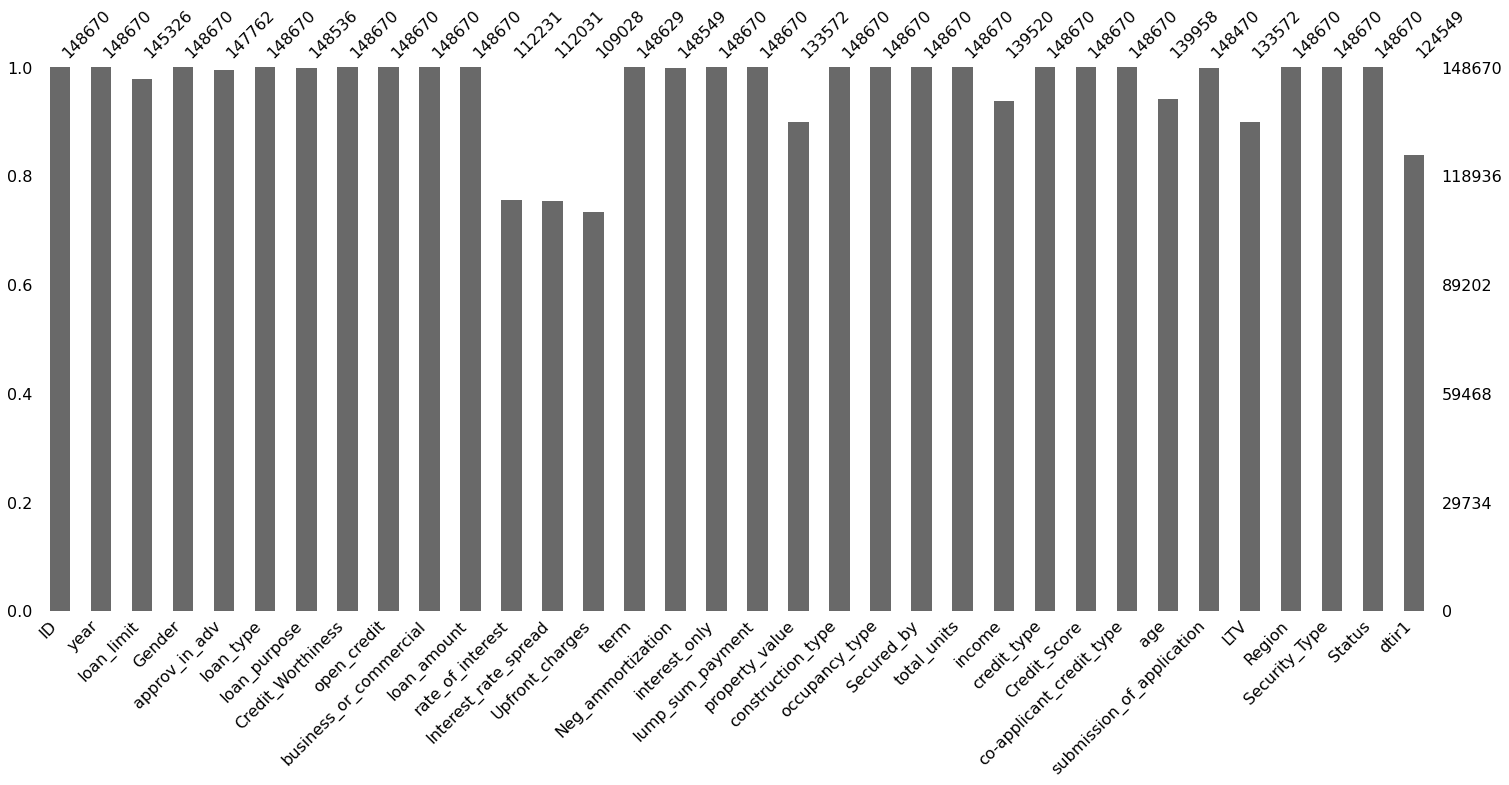

In [14]:
ms.bar(df)

<AxesSubplot:>

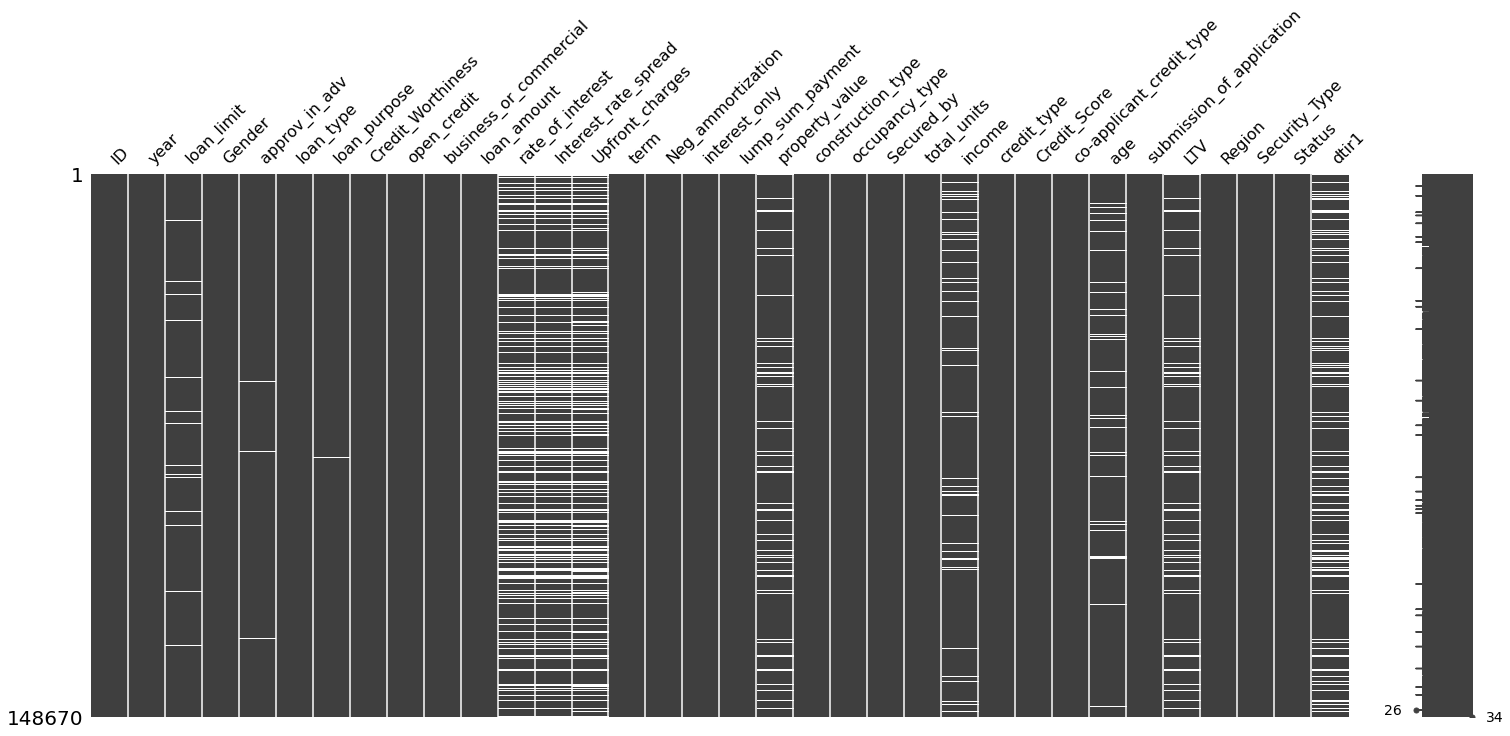

In [15]:
ms.matrix(df)

In [16]:
df["Upfront_charges"].describe()

count    109028.000000
mean       3224.996127
std        3251.121510
min           0.000000
25%         581.490000
50%        2596.450000
75%        4812.500000
max       60000.000000
Name: Upfront_charges, dtype: float64

In [17]:
df=df.copy()
df["Upfront_charges"].fillna(df["Upfront_charges"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
Interest_rate_spread              36639          24.644515
rate_of_interest                  36439          24.509989
dtir1                             24121          16.224524
property_value                    15098          10.155378
LTV                               15098          10.155378
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [18]:
df["Interest_rate_spread"].describe()

count    112031.000000
mean          0.441656
std           0.513043
min          -3.638000
25%           0.076000
50%           0.390400
75%           0.775400
max           3.357000
Name: Interest_rate_spread, dtype: float64

In [19]:
df["Interest_rate_spread"].fillna(df["Interest_rate_spread"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
rate_of_interest                  36439          24.509989
dtir1                             24121          16.224524
property_value                    15098          10.155378
LTV                               15098          10.155378
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

Here we print missing value count data with their percentage.

In [20]:
df["rate_of_interest"].describe()

count    112231.000000
mean          4.045476
std           0.561391
min           0.000000
25%           3.625000
50%           3.990000
75%           4.375000
max           8.000000
Name: rate_of_interest, dtype: float64

In [21]:
df["rate_of_interest"].fillna(df["rate_of_interest"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
dtir1                             24121          16.224524
property_value                    15098          10.155378
LTV                               15098          10.155378
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [22]:
df["dtir1"].describe()

count    124549.000000
mean         37.732932
std          10.545435
min           5.000000
25%          31.000000
50%          39.000000
75%          45.000000
max          61.000000
Name: dtir1, dtype: float64

In [23]:
df["dtir1"].fillna(df["dtir1"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
property_value                    15098          10.155378
LTV                               15098          10.155378
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [24]:
df["property_value"].describe()

count    1.335720e+05
mean     4.978935e+05
std      3.599353e+05
min      8.000000e+03
25%      2.680000e+05
50%      4.180000e+05
75%      6.280000e+05
max      1.650800e+07
Name: property_value, dtype: float64

In [25]:
df["property_value"].fillna(df["property_value"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
LTV                               15098          10.155378
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [26]:
df["LTV"].describe()

count    133572.000000
mean         72.746457
std          39.967603
min           0.967478
25%          60.474860
50%          75.135870
75%          86.184211
max        7831.250000
Name: LTV, dtype: float64

In [27]:
df["LTV"].fillna(df["LTV"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
income                             9150           6.154571
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [28]:
df["income"].describe()

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64

In [29]:
df["income"].fillna(df["income"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
age                                8712           5.859958
loan_limit                         3344           2.249277
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [30]:
df["loan_limit"].describe()

count     145326
unique         2
top           cf
freq      135348
Name: loan_limit, dtype: object

In [31]:
df["loan_limit"].fillna(df["loan_limit"].mode()[0],inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
age                                8712           5.859958
approv_in_adv                       908           0.610749
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [32]:
df["approv_in_adv"].describe()

count     147762
unique         2
top        nopre
freq      124621
Name: approv_in_adv, dtype: object

In [33]:
df["approv_in_adv"].fillna(df["approv_in_adv"].mode()[0],inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
age                                8712           5.859958
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [34]:
df["age"].describe()

count    139958.000000
mean         45.208634
std          12.674613
min          25.000000
25%          35.000000
50%          45.000000
75%          55.000000
max          65.000000
Name: age, dtype: float64

In [35]:
df["age"].fillna(df["age"].median(),inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
submission_of_application           200           0.134526
loan_purpose                        134           0.090133
Neg_ammortization                   121           0.081388
term                                 41           0.027578

In [36]:
df["submission_of_application"].describe()

count      148470
unique          2
top       to_inst
freq        95814
Name: submission_of_application, dtype: object

In [37]:
df["submission_of_application"].fillna(df["submission_of_application"].mode()[0],inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
loan_purpose                134           0.090133
Neg_ammortization           121           0.081388
term                         41           0.027578

In [38]:
df["loan_purpose"].describe()

count     148536
unique         4
top           p3
freq       55934
Name: loan_purpose, dtype: object

In [39]:
df["loan_purpose"].fillna(df["loan_purpose"].mode()[0],inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
Neg_ammortization           121           0.081388
term                         41           0.027578

In [40]:
df["Neg_ammortization"].describe()

count      148549
unique          2
top       not_neg
freq       133420
Name: Neg_ammortization, dtype: object

In [41]:
df["Neg_ammortization"].fillna(df["Neg_ammortization"].mode()[0],inplace=True)
missingval(df)

missvalcount  missvalpercent(%)
term            41           0.027578

In [42]:
df["term"].describe()

count    148629.000000
mean        335.136582
std          58.409084
min          96.000000
25%         360.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: term, dtype: float64

In [43]:
df["term"].fillna(df["term"].mode()[0],inplace=True)
missingval(df)

Empty DataFrame
Columns: [missvalcount, missvalpercent(%)]
Index: []

Here , filling the misssing values in the column of the data frame with the median value for numerical data & mode value for catecorigal data of the missing column.

In [44]:
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [45]:
# Create an Excel writer object
writer = pd.ExcelWriter('loan_tableau.xlsx', engine='xlsxwriter')

# Write the DataFrame to the Excel file
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Save the Excel file
writer.save()


In [46]:
import os
print(os.getcwd())


C:\Users\Dinesh


We taking Excel file for tableue visuvalization for making dashboard.

# Data manipulation using python

In [269]:
df1=df.copy()

In [270]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

1.How many unique loan applications are there in the dataset?

In [49]:

unique_loan_applications = len(df1['ID'].unique())
print(unique_loan_applications)


148670


2.What is the average loan limit?

In [50]:
average_loan_limit = df1['loan_limit'].mode()[0]
print(average_loan_limit)


cf


The average loan limit is cf (The loan limit approved based on the applicant's creditworthiness)

3.How many loan applications were approved in advance?

In [51]:
approved_in_advance_count = df1['approv_in_adv'].value_counts().sum()
print(approved_in_advance_count)


148670


4.What is the maximum loan amount approved?

In [52]:
max_loan_amount = df1['loan_amount'].max()
print(max_loan_amount)


3576500


The maximum loan amount approved is 3576500.

5.How many loan applications have negative amortization?

In [53]:
negative_amortization_count = df1['Neg_ammortization'].value_counts()[1]
print(negative_amortization_count)


15129


It provide the 15129 of loan applications with negative amortization.

6.What is the average credit score?

In [54]:
average_credit_score =round(df1['Credit_Score'].mean())
print(average_credit_score)


700


The average credit score "700" provides a measure of the overall creditworthiness of the applicants in the dataset. It indicates the average level of creditworthiness among the individuals who have applied for loans.

7.How many loan applications have an interest-only payment option?


In [55]:
interest_only_count = df1['interest_only'].value_counts()[1]
print(interest_only_count)


7110


The count of loan applications is "7110" with an interest-only payment option provides an understanding of the proportion of applicants who opted for this payment arrangement. It indicates the popularity or preference for interest-only payment plans among the loan applicants.






8.What is the average debt-to-income ratio?


In [56]:
average_dtir = df1['dtir1'].mean()
print(average_dtir)


37.93850810519943


A debt-to-income ratio of 37.94%, indicating that their monthly debt payments account for about 37.94% of their monthly income.

9.How many loan applications are for business or commercial purposes?

In [57]:
business_or_commercial_count = df1['business_or_commercial'].value_counts()["b/c"]
print(business_or_commercial_count)


20762


10.What is the total loan amount approved for each loan purpose?

In [275]:
total_loan_amount_by_purpose = df1.groupby('loan_purpose')['loan_amount'].sum()
print(total_loan_amount_by_purpose)


loan_purpose
p1    11696848500
p2      662861000
p3    16533762000
p4    20333803500
Name: loan_amount, dtype: int64


11.What is the maximum loan limit for each loan type?

In [59]:
max_loan_limit_by_type = df1.groupby('loan_type')['loan_limit'].max()
print(max_loan_limit_by_type)


loan_type
type1    ncf
type2    ncf
type3    ncf
Name: loan_limit, dtype: object


It appears that the loan limit values are stored as strings ("ncf") in the current output.

13.What is the maximum loan term?

In [60]:
max_loan_term = df1['term'].max()
print(max_loan_term)


360.0


# Statistical techniques

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

### Describe for numerical data

In [62]:
df1.describe().T.apply(lambda s:s.apply("{0:6f}".format))

count           mean            std  \
ID                    148670.000000   99224.500000   42917.476598   
year                  148670.000000    2019.000000       0.000000   
loan_amount           148670.000000  331117.743997  183909.310127   
rate_of_interest      148670.000000       4.031879       0.488348   
Interest_rate_spread  148670.000000       0.429024       0.445907   
Upfront_charges       148670.000000    3057.397919    2797.972965   
term                  148670.000000     335.143438      58.402488   
property_value        148670.000000  489779.982512  342022.063957   
income                148670.000000    6883.647811    6300.067060   
Credit_Score          148670.000000     699.789103     115.875857   
age                   148670.000000      45.196408      12.297739   
LTV                   148670.000000      72.989111      37.890714   
Status                148670.000000       0.246445       0.430942   
dtir1                 148670.000000      37.938508       9.663417   

                               min            25%            50%  \
ID                    24890.000000   62057.250000   99224.500000   
year                   2019.000000    2019.000000    2019.000000   
loan_amount           16500.000000  196500.000000  296500.000000   
rate_of_interest          0.000000       3.750000       3.990000   
Interest_rate_spread     -3.638000       0.181500       0.390400   
Upfront_charges           0.000000    1250.000000    2596.450000   
term                     96.000000     360.000000     360.000000   
property_value         8000.000000  288000.000000  418000.000000   
income                    0.000000    3840.000000    5760.000000   
Credit_Score            500.000000     599.000000     699.000000   
age                      25.000000      35.000000      45.000000   
LTV                       0.967478      63.297872      75.135870   
Status                    0.000000       0.000000       0.000000   
dtir1                     5.000000      33.000000      39.000000   

                                75%              max  
ID                    136391.750000    173559.000000  
year                    2019.000000      2019.000000  
loan_amount           436500.000000   3576500.000000  
rate_of_interest           4.250000         8.000000  
Interest_rate_spread       0.620000         3.357000  
Upfront_charges         3889.495000     60000.000000  
term                     360.000000       360.000000  
property_value        598000.000000  16508000.000000  
income                  8280.000000    578580.000000  
Credit_Score             800.000000       900.000000  
age                       55.000000        65.000000  
LTV                       84.722222      7831.250000  
Status                     0.000000         1.000000  
dtir1                     44.000000        61.000000

This table presents the following statistical measures for each numerical variable:

Count: Number of non-null values in the column.

Mean: Arithmetic mean (average) of the values.

Std: Standard deviation, which measures the dispersion of the values.

Min: Minimum value in the column.

25%: 25th percentile (Q1), the value below which 25% of the data falls.

50%: 50th percentile (Q2), also known as the median.

75%: 75th percentile (Q3), the value below which 75% of the data falls.

Max: Maximum value in the column.

These statistics provide insights into the central tendency, spread, and distribution of the numerical variables in the dataset.

To provide statistical insights for the numerical variable "dtir1," here are the descriptive statistics:

Minimum: 5.000000

25th percentile (Q1): 9.634812

Median (50th percentile or Q2): 37.985355

75th percentile (Q3): 44.000000

Maximum: 61.000000

These statistics provide information about the distribution of the variable "dtir1" within the dataset. The minimum value is 5, and the maximum value is 61, indicating the range of the variable's values. The median (Q2) is 37.985355, which represents the middle value when the data is sorted in ascending order. The 25th percentile (Q1) is 9.634812, meaning that 25% of the data points have a value less than or equal to this value. The 75th percentile (Q3) is 44.000000, indicating that 75% of the data points have a value less than or equal to this value.

These statistical measures provide insights into the central tendency and spread of the "dtir1" variable within the dataset.

### Describe for categorical data

In [63]:
df.describe(include="object").T

count unique       top    freq
loan_limit                 148670      2        cf  138692
Gender                     148670      4      Male   42346
approv_in_adv              148670      2     nopre  125529
loan_type                  148670      3     type1  113173
loan_purpose               148670      4        p3   56068
Credit_Worthiness          148670      2        l1  142344
open_credit                148670      2      nopc  148114
business_or_commercial     148670      2     nob/c  127908
Neg_ammortization          148670      2   not_neg  133541
interest_only              148670      2   not_int  141560
lump_sum_payment           148670      2  not_lpsm  145286
construction_type          148670      2        sb  148637
occupancy_type             148670      3        pr  138201
Secured_by                 148670      2      home  148637
total_units                148670      4        1U  146480
credit_type                148670      4       CIB   48152
co-applicant_credit_type   148670      2       CIB   74392
submission_of_application  148670      2   to_inst   96014
Region                     148670      4     North   74722
Security_Type              148670      2    direct  148637

This table provides the following statistical insights for each categorical variable:

Count: Number of non-null values in the column.

Unique: Number of distinct values in the column.

Top: Most frequent value in the column.

Freq: Frequency of the top value in the column.

Based on the provided data, here are the statistical insights for the variable "Security_Type":

Count: 148670

Unique values: 2

Top value: direct

Frequency of the top value: 100,288

This means that out of the 148670 data points, 100,288 of them have "Security_Type" as "direct". The remaining data points have a different value for this variable.

In [64]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel, chi2_contingency, pearsonr
from statsmodels.formula.api import ols

## An independent T-test is conducted to compare the loan amounts between two groups based on the target variable "Status."

Hypotheses:

Null Hypothesis (H0): There is no significant difference in the mean loan amounts between the two groups defined by the target variable "Status."

Alternative Hypothesis (H1): There is a significant difference in the mean loan amounts between the two groups defined by the target variable "Status."

In [65]:


# Independent T-Test (Numerical variable)
numerical_var = 'loan_amount'
group1 = df[df['Status'] == 0][numerical_var]
group2 = df[df['Status'] == 1][numerical_var]
t_stat, p_value = ttest_ind(group1, group2)
print("Independent T-Test - loan_amount vs. Status:")
print("T-Statistic:", t_stat)
print("P-value:", p_value)


Independent T-Test - loan_amount vs. Status:
T-Statistic: 14.208539142794285
P-value: 8.690627679806422e-46


INFERENCE

   The p-value is less than the significance level (commonly 0.05),  reject the null hypothesis. It indicates that there is sufficient evidence to support the alternative hypothesis. In this case,  we conclude that there is a significant difference in the mean loan amounts between the two groups defined by the target variable "Status."

# Is there a significant difference between the different age groups when it comes to loan status ?

Hypotheses:

Null Hypothesis (H0): There is no significant difference in loan status based on gender.

Alternative Hypothesis (H1): There is a significant difference in loan status based on gender.

In [66]:
import pandas as pd
from scipy.stats import chi2_contingency

In [67]:
# Create a contingency table of loan status and gender
contingency_table = pd.crosstab(df['Status'], df['Gender'])
contingency_table

Gender  Female  Joint   Male  Sex Not Available
Status                                         
0        20418  33466  31255              26892
1         6848   7933  11091              10767

In [68]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [69]:

# Print the results
print("Chi-Square Test - Loan Status vs. Gender:")
print("Chi2:", chi2)
print("P-value:", p_value)


Chi-Square Test - Loan Status vs. Gender:
Chi2: 1043.6008495787446
P-value: 6.2600483303596965e-226


The p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis. This suggests that there is sufficient evidence to support the alternative hypothesis. In other words, there is a significant difference in loan status based on gender.

# TASK 1.3 (Exploratory Data Analysis)

### Univariate plots

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns



In [71]:
def plot_columns(df):
    # Get the list of column names from the DataFrame
    columns = df.columns.tolist()

    # Plot each column using a loop
    for column in columns:
        plt.figure(figsize=(8, 7))
        sns.histplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

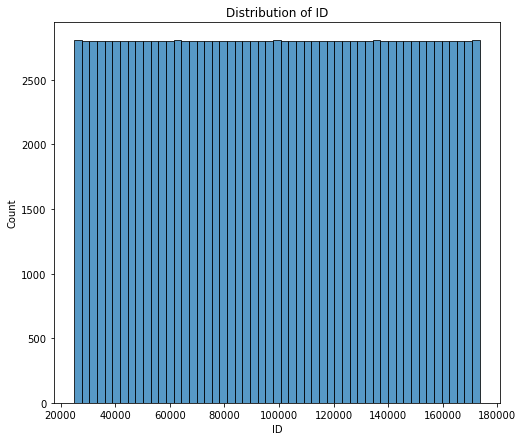

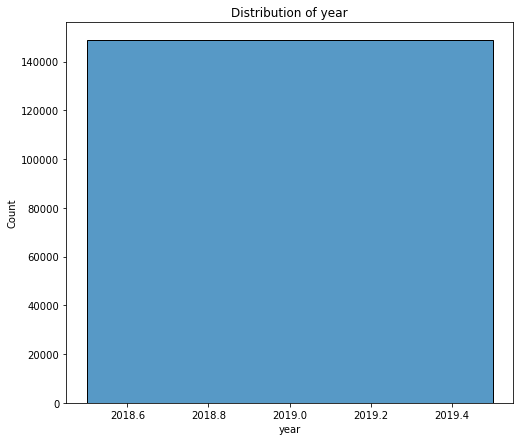

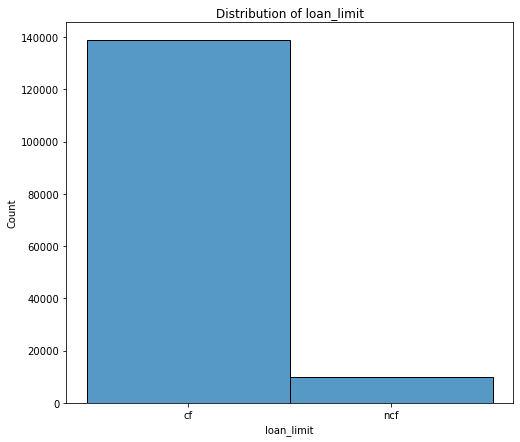

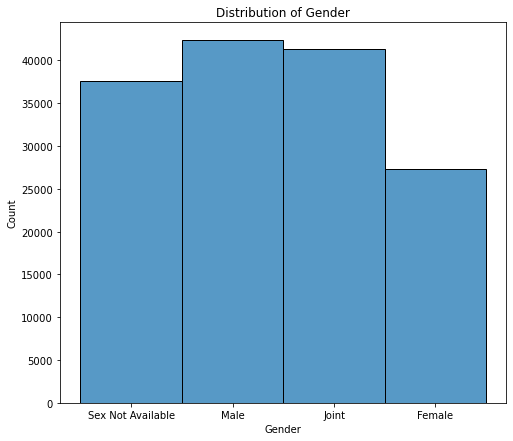

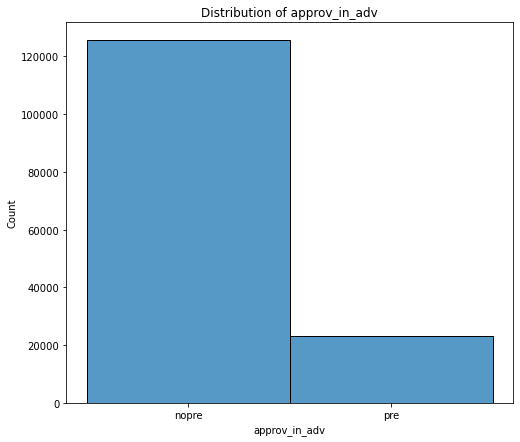

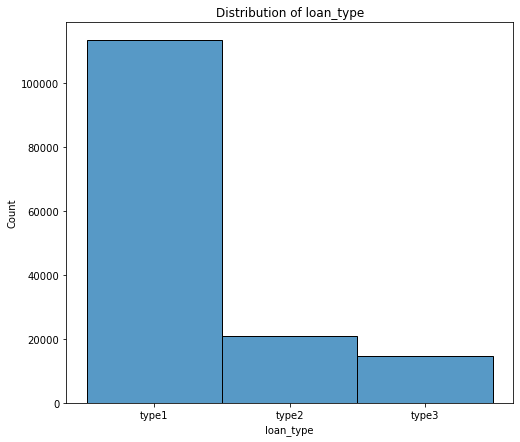

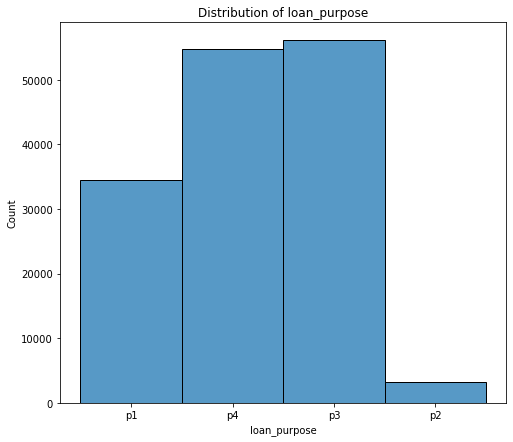

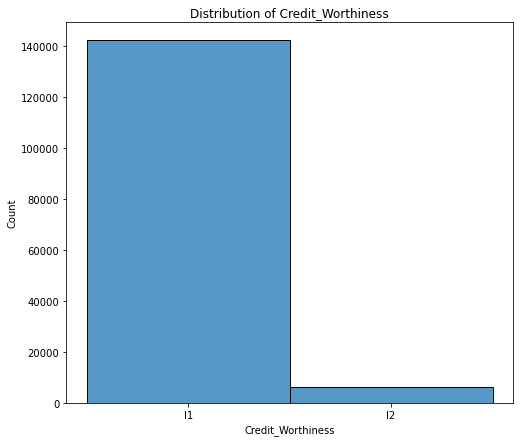

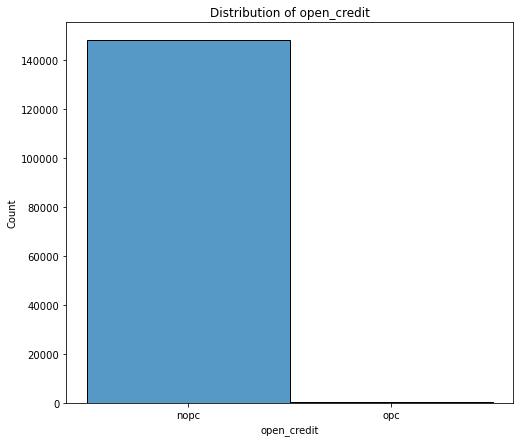

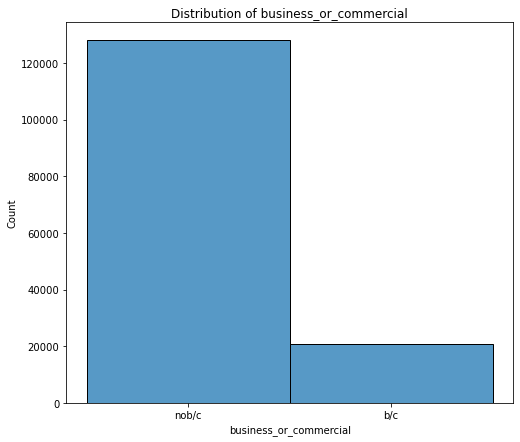

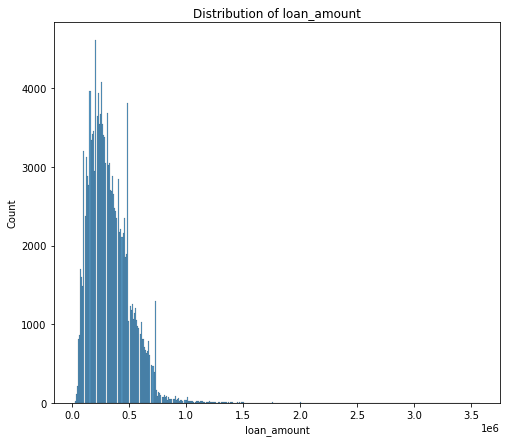

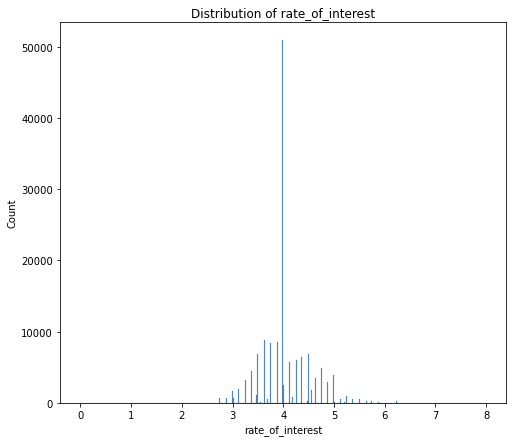

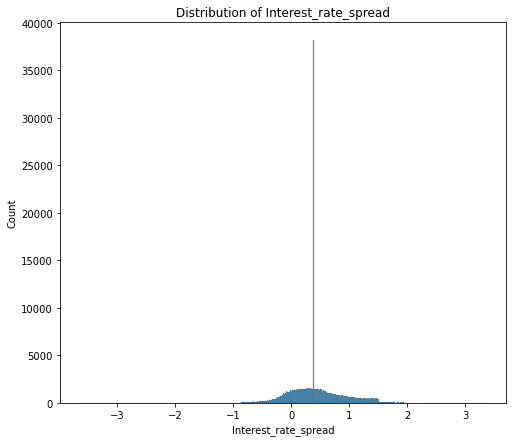

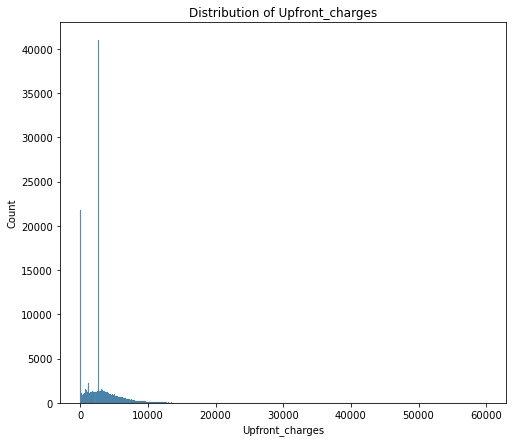

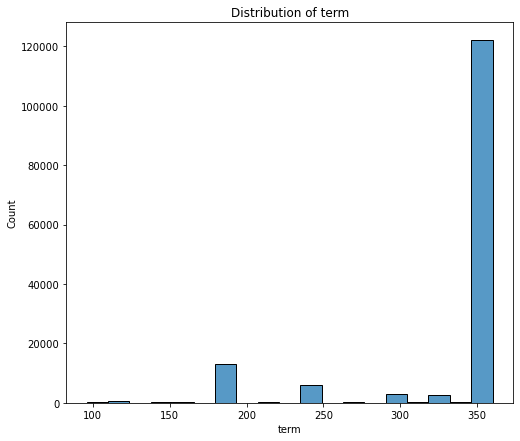

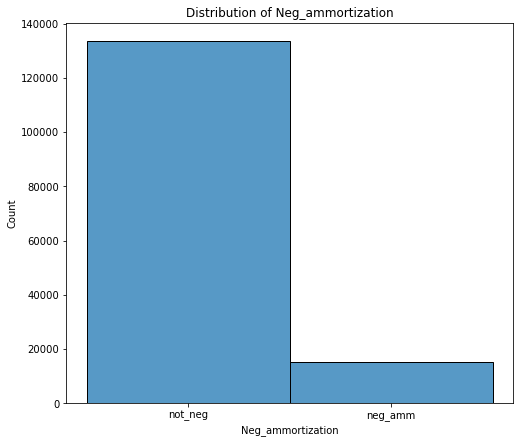

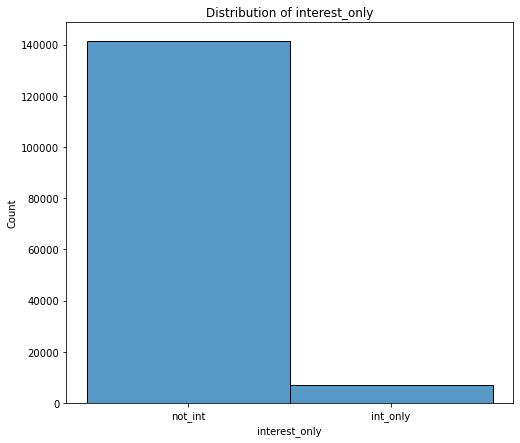

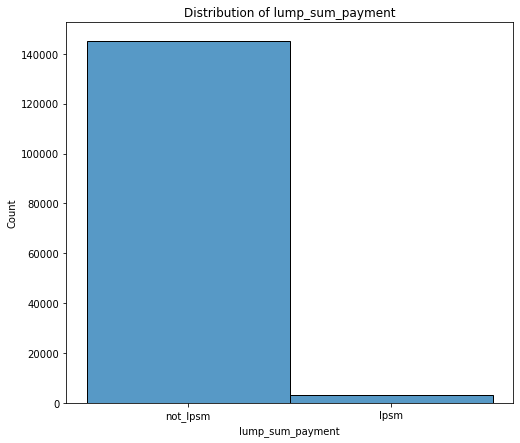

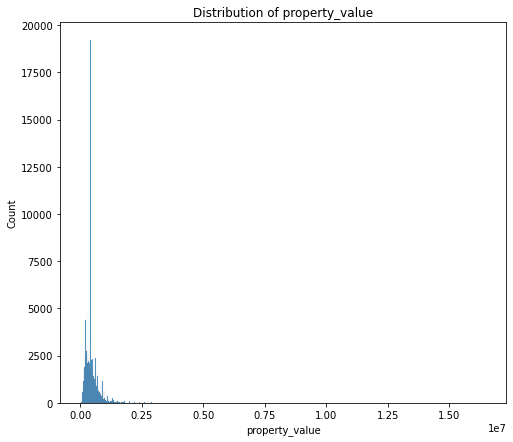

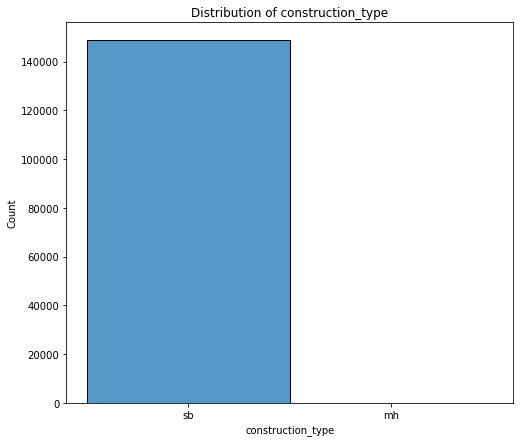

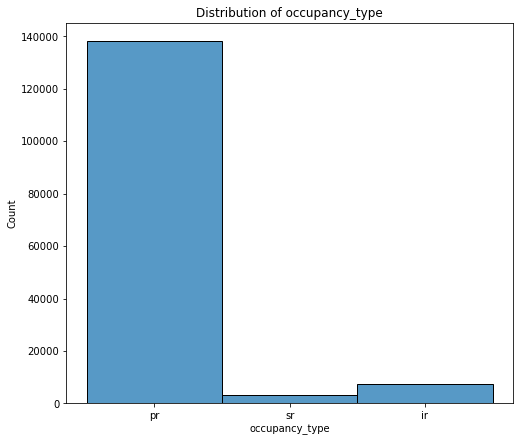

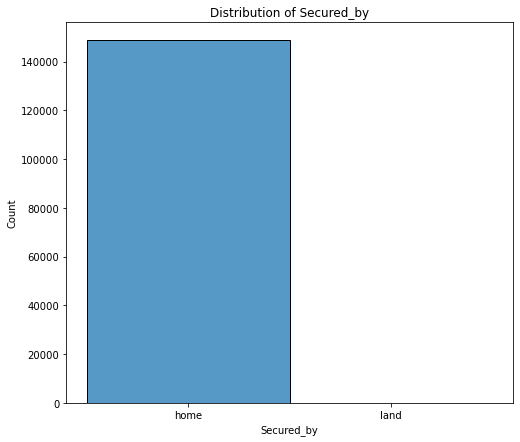

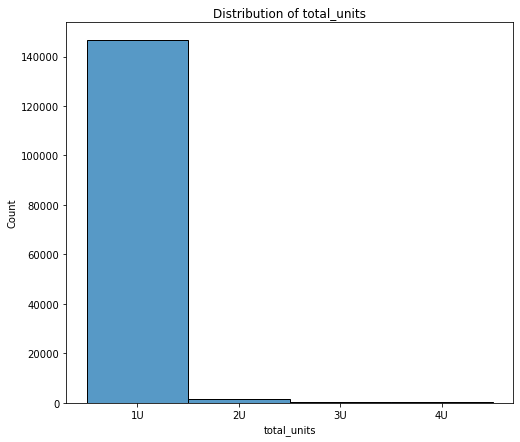

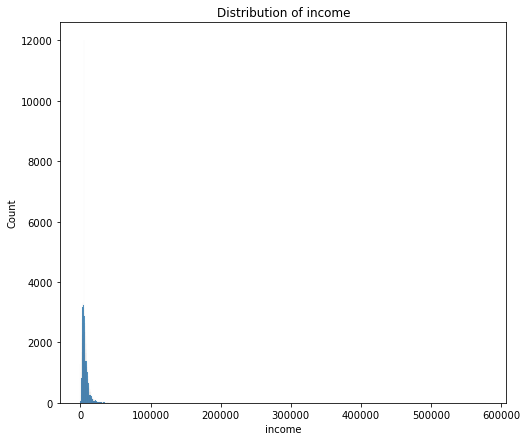

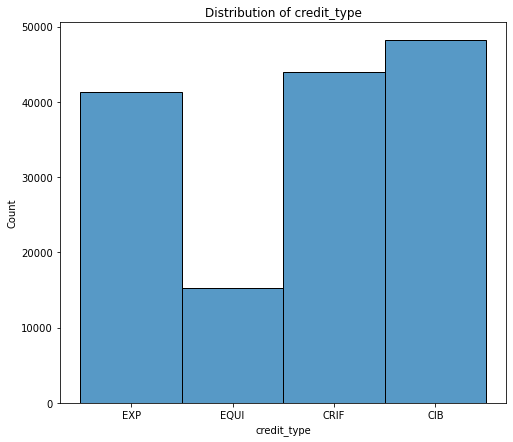

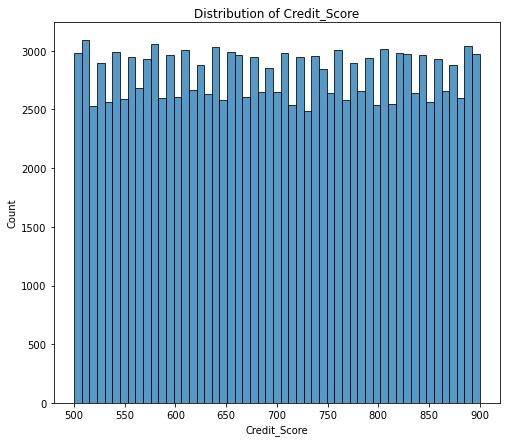

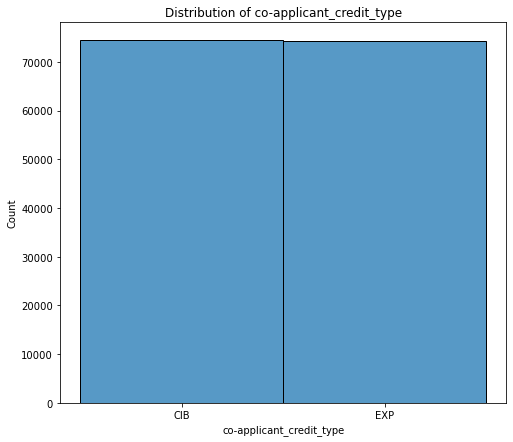

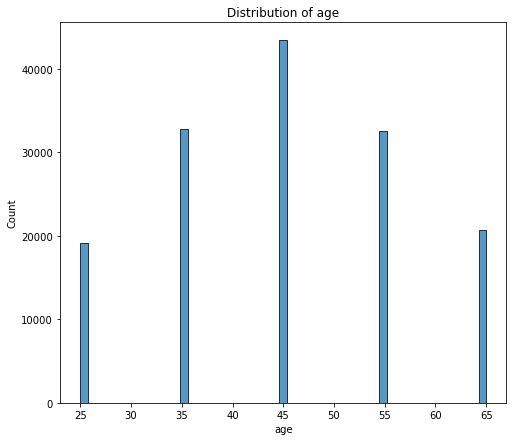

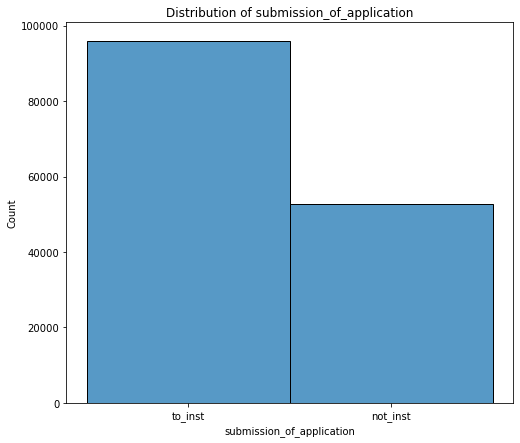

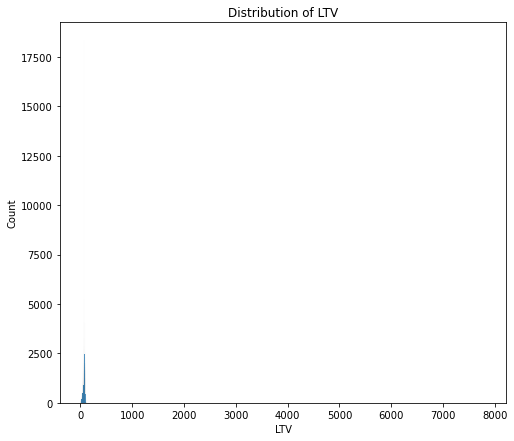

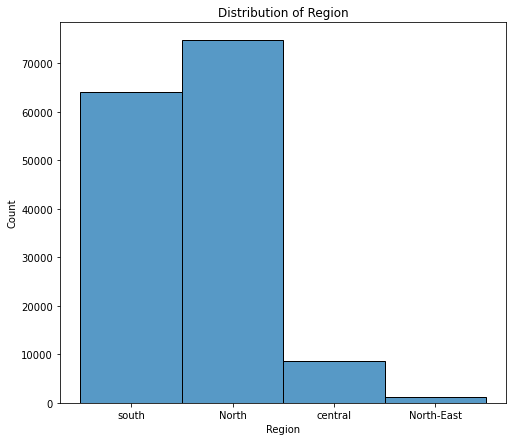

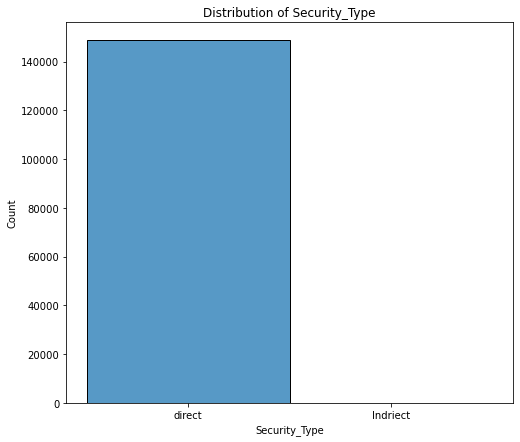

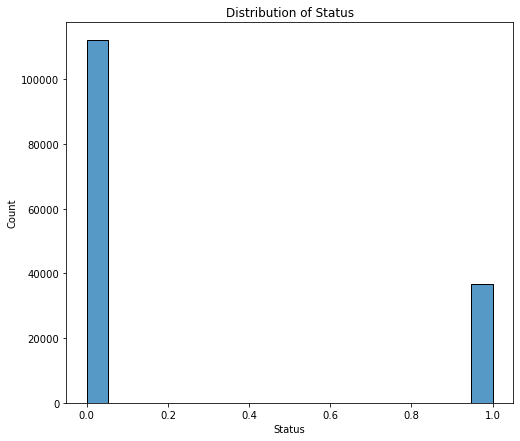

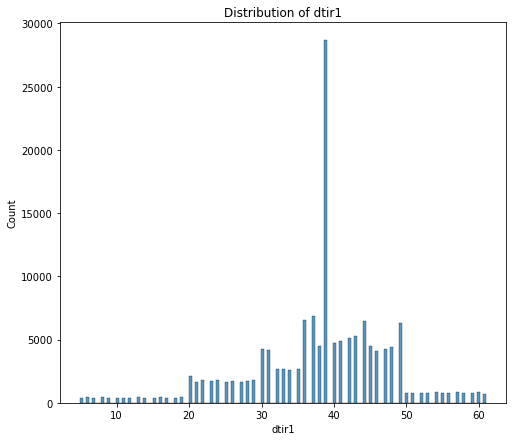

In [72]:
plot_columns(df)

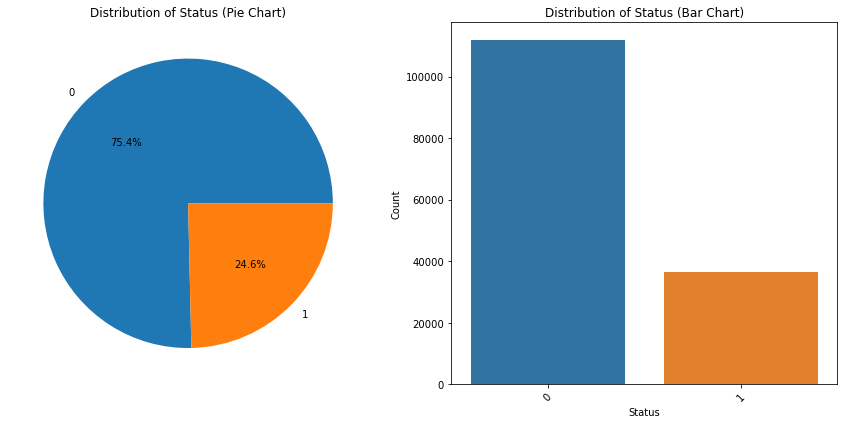

In [73]:
import matplotlib.pyplot as plt

def plot_target_col(df1, target_col):
    plt.figure(figsize=(12, 6))
    
    # Pie chart
    plt.subplot(1, 2, 1)
    counts = df1[target_col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {target_col} (Pie Chart)')

    # Bar chart
    plt.subplot(1, 2, 2)
    sns.countplot(data=df1, x=target_col)
    plt.title(f'Distribution of {target_col} (Bar Chart)')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and the target column name
plot_target_col(df1, 'Status')


Approximately 24.6% of the loans in the dataset are classified as  (Status = 1) and 75.6% of the loans in the dataset are classified as (status=0). 

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

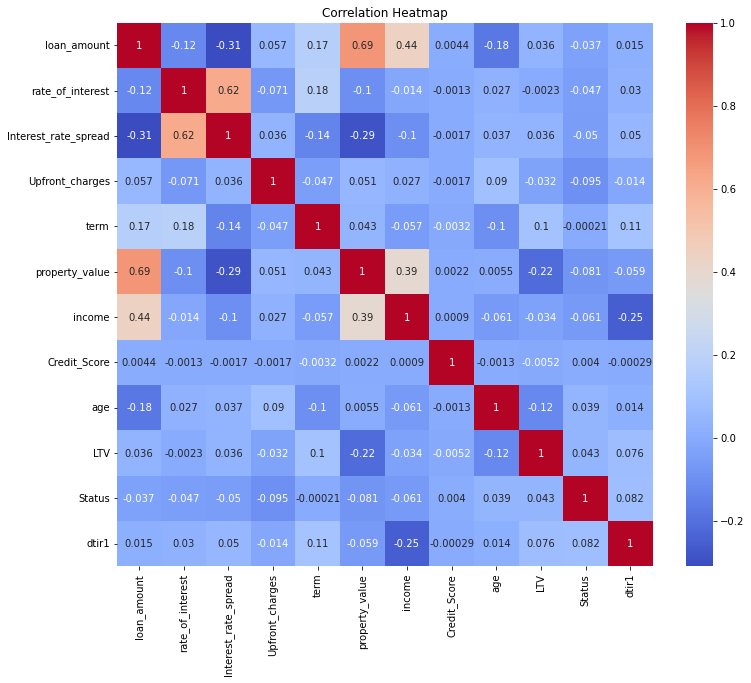

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the "ID" and "year" columns
df_without_id_year = df.drop(["ID", "year"], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_without_id_year.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()





There is a strong positive correlation between the loan amount and the property value, indicating that as the property value increases, the loan amount tends to increase as well.

Higher credit scores are associated with higher credit worthiness, as indicated by the positive correlation between the credit score and credit worthiness.

Loans with higher interest rate spreads tend to have higher rates of interest, suggesting that the interest rates charged on loans may be influenced by the interest rate spread.

There is a positive correlation between the loan amount and income, suggesting that individuals with higher incomes may qualify for larger loan amounts.

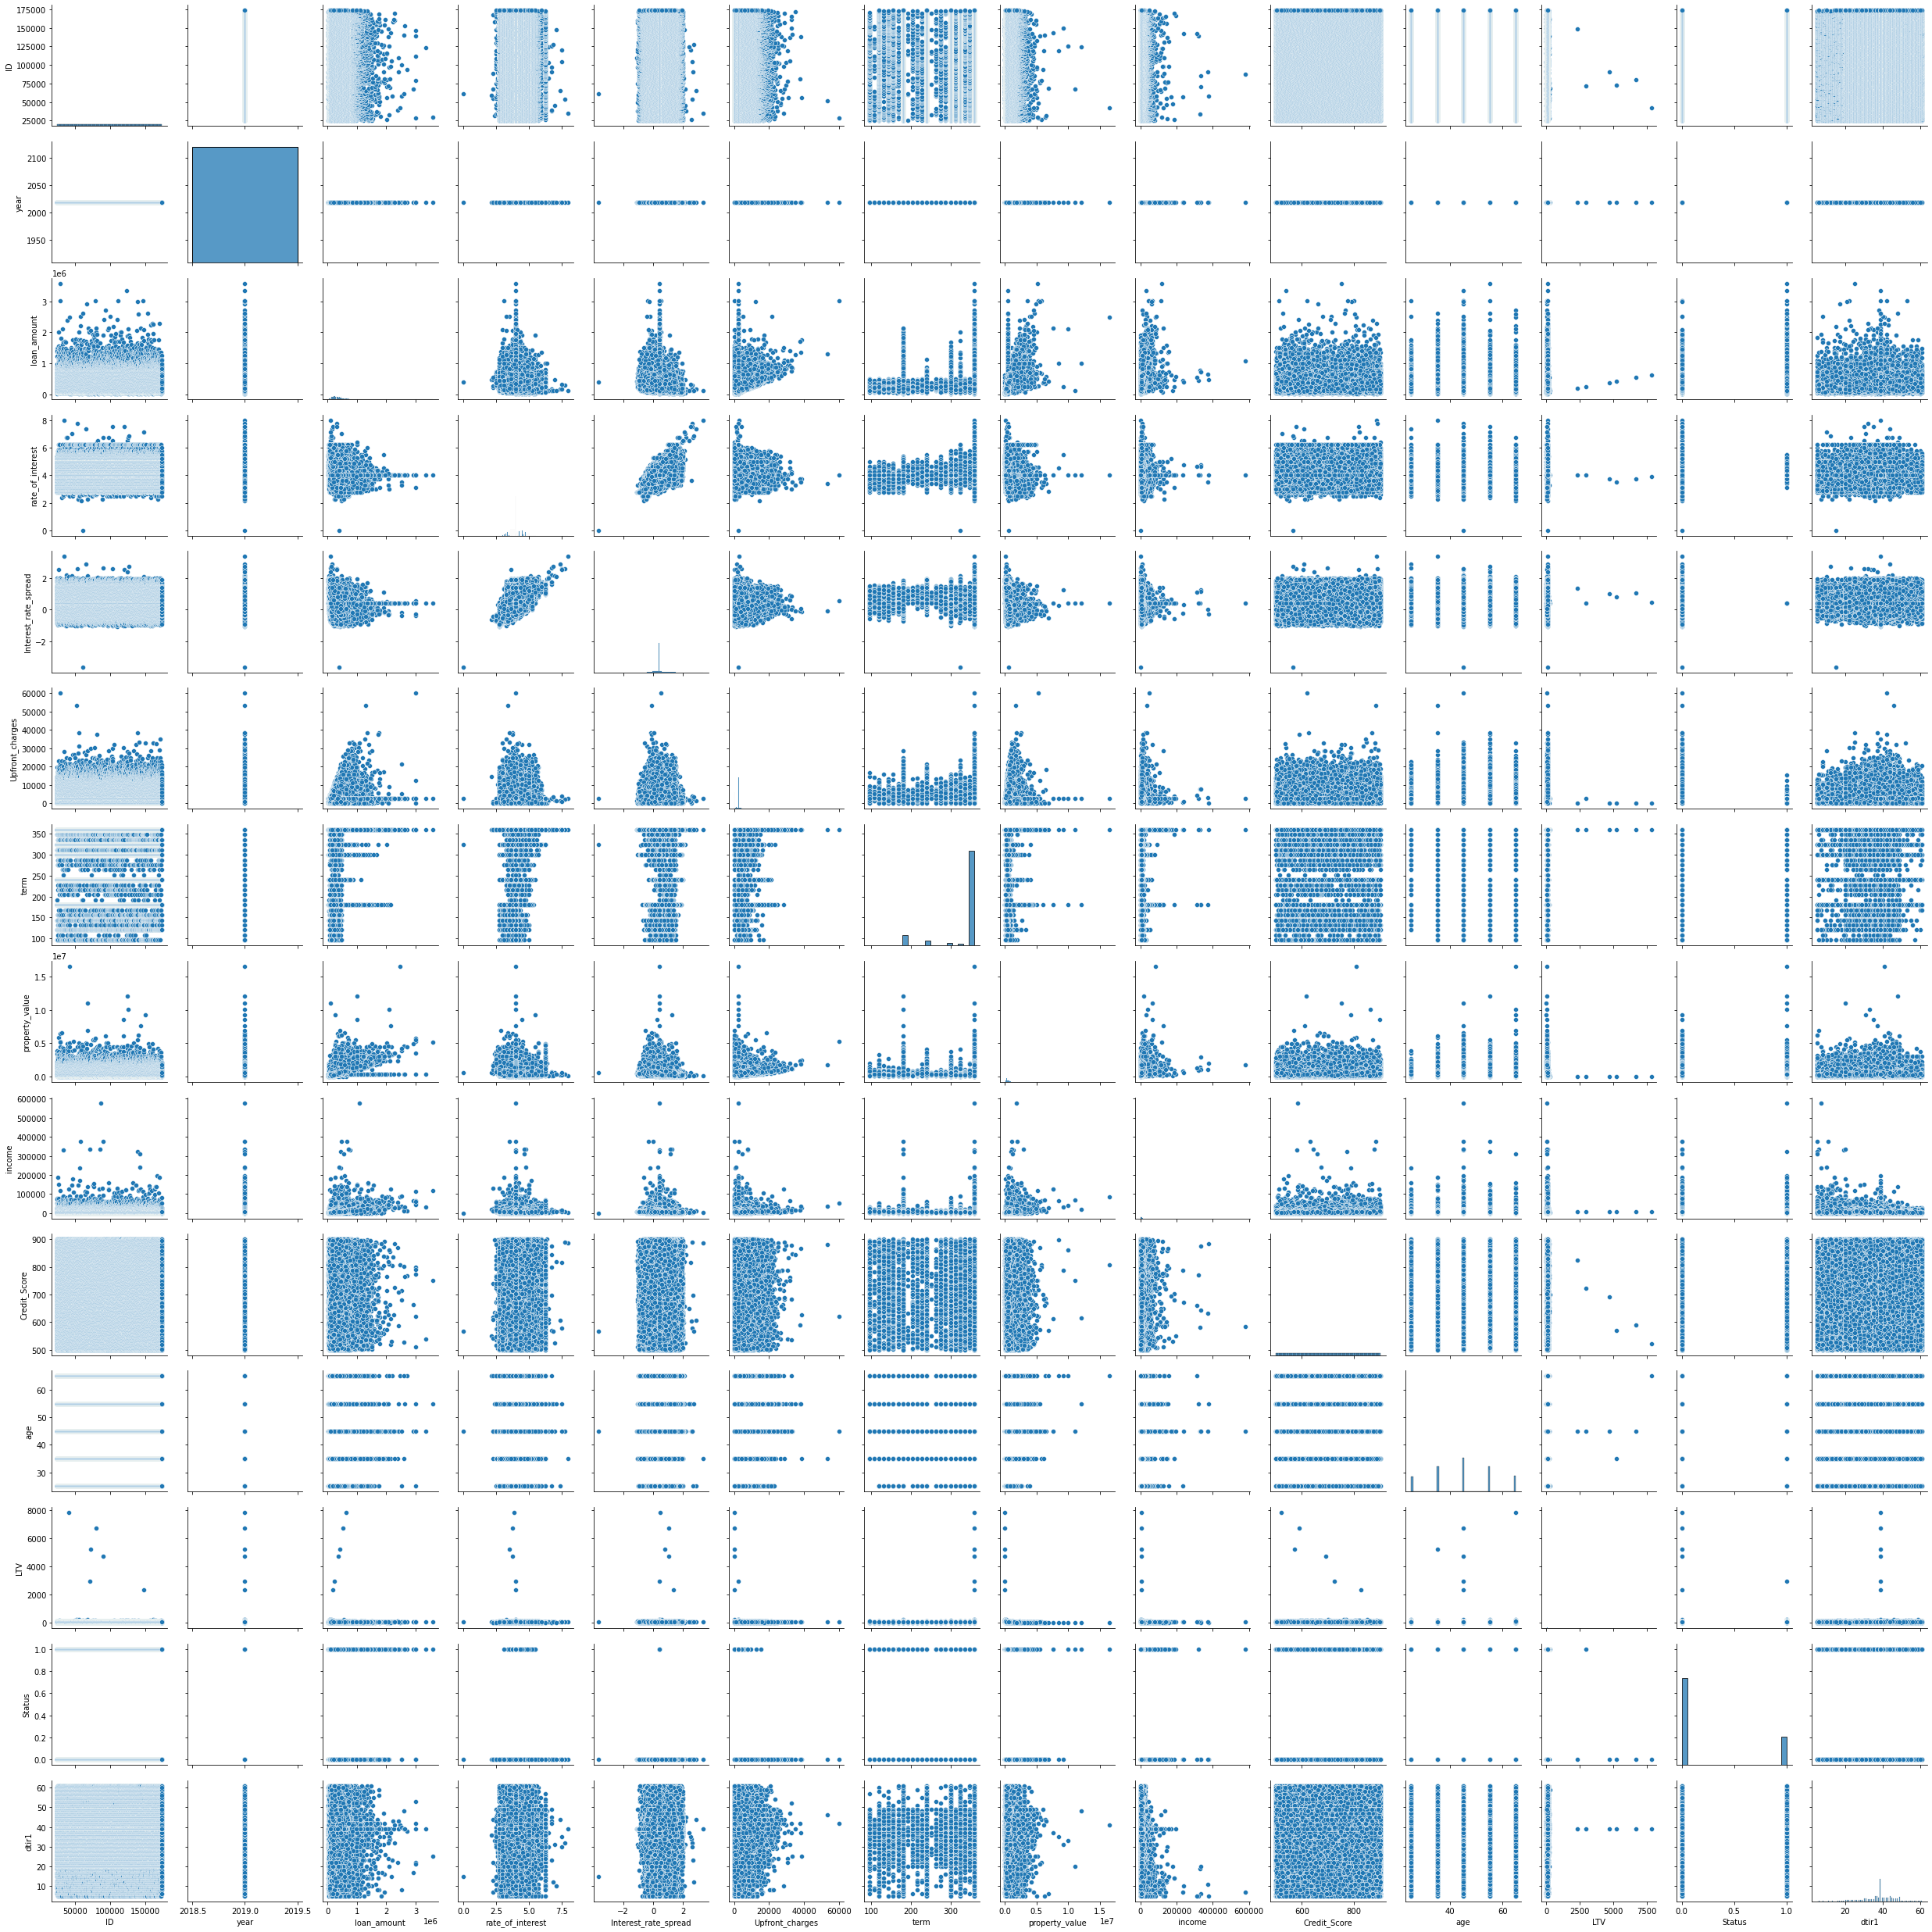

In [76]:
import seaborn as sns

numeric_cols = df.select_dtypes(include='number')
sns.pairplot(numeric_cols)


Overall, the pair plot allows us to quickly assess the relationships between multiple numerical variables in the dataset. It helps in identifying potential patterns, correlations, and outliers, providing insights that can guide further analysis or modeling decisions.

In [77]:


dummy_data = pd.get_dummies(df1)


In [78]:
dummy_data.head().style.background_gradient(vmin=0)

This DataFrame seems to have been transformed by encoding categorical variables into dummy variables to represent them numerically. The encoding allows for easier analysis and modeling of the data.

In [79]:
def show_datashape(df1):
    print("Data shape:", df1.shape)


In [80]:
show_datashape(dummy_data)

Data shape: (148670, 66)


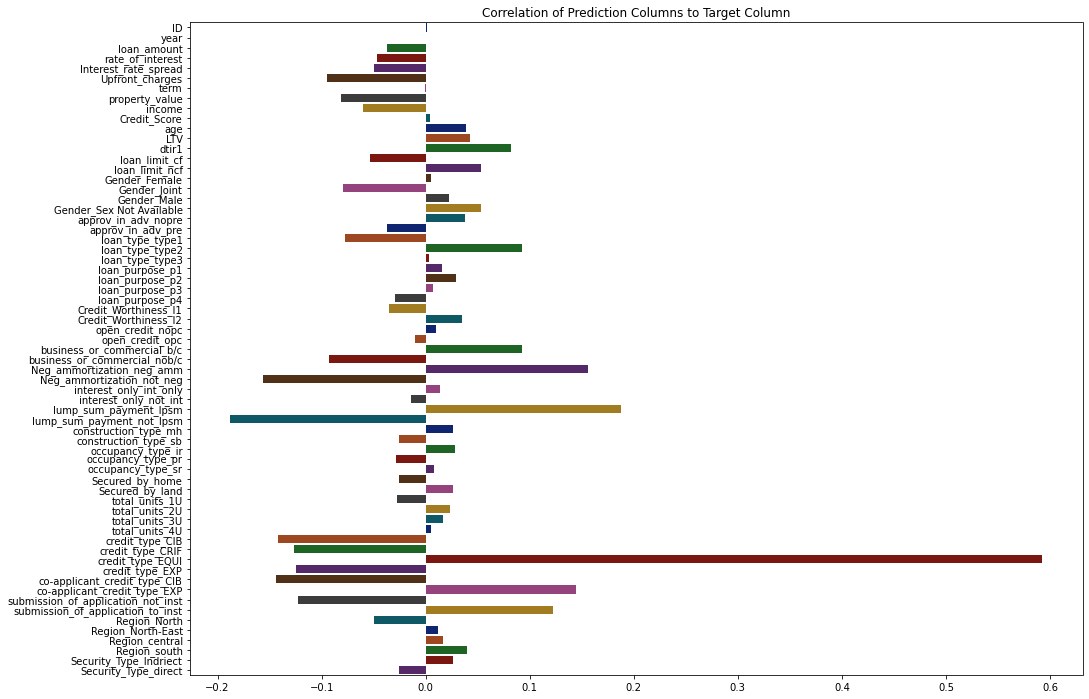

In [81]:
_,ax = plt.subplots(1,1,figsize=(16,12))
sns.barplot( x = dummy_data.corr().Status.drop('Status').values, y = dummy_data.corr().Status.drop('Status').index, palette='dark', ax=ax)
ax.set_title('Correlation of Prediction Columns to Target Column')
plt.show()

Insights from the plot:

The bar plot provides insights into the relationship between the prediction columns and the target column. Positive correlation values indicate a positive relationship, while negative correlation values indicate a negative relationship.

The height of the bars represents the magnitude of the correlation. "credit_type_EQUI" indicate a stronger correlation between the prediction column and the target column.

The plot helps identify which prediction columns have a lump_sum_payment_not_lpsm is weaker correlation with the target column. 

By analyzing the plot, you can identify the prediction columns that exhibit a significant positive or negative correlation with the target column, which can be valuable in feature selection or understanding the factors that influence the loan status.

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

# Outlier detection

In [83]:
df1.describe().T

count           mean            std           min  \
ID                    148670.0   99224.500000   42917.476598  24890.000000   
year                  148670.0    2019.000000       0.000000   2019.000000   
loan_amount           148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest      148670.0       4.031879       0.488348      0.000000   
Interest_rate_spread  148670.0       0.429024       0.445907     -3.638000   
Upfront_charges       148670.0    3057.397919    2797.972965      0.000000   
term                  148670.0     335.143438      58.402488     96.000000   
property_value        148670.0  489779.982512  342022.063957   8000.000000   
income                148670.0    6883.647811    6300.067060      0.000000   
Credit_Score          148670.0     699.789103     115.875857    500.000000   
age                   148670.0      45.196408      12.297739     25.000000   
LTV                   148670.0      72.989111      37.890714      0.967478   
Status                148670.0       0.246445       0.430942      0.000000   
dtir1                 148670.0      37.938508       9.663417      5.000000   

                                25%           50%            75%           max  
ID                     62057.250000   99224.50000  136391.750000  1.735590e+05  
year                    2019.000000    2019.00000    2019.000000  2.019000e+03  
loan_amount           196500.000000  296500.00000  436500.000000  3.576500e+06  
rate_of_interest           3.750000       3.99000       4.250000  8.000000e+00  
Interest_rate_spread       0.181500       0.39040       0.620000  3.357000e+00  
Upfront_charges         1250.000000    2596.45000    3889.495000  6.000000e+04  
term                     360.000000     360.00000     360.000000  3.600000e+02  
property_value        288000.000000  418000.00000  598000.000000  1.650800e+07  
income                  3840.000000    5760.00000    8280.000000  5.785800e+05  
Credit_Score             599.000000     699.00000     800.000000  9.000000e+02  
age                       35.000000      45.00000      55.000000  6.500000e+01  
LTV                       63.297872      75.13587      84.722222  7.831250e+03  
Status                     0.000000       0.00000       0.000000  1.000000e+00  
dtir1                     33.000000      39.00000      44.000000  6.100000e+01

In [84]:
#loan_amount

<AxesSubplot:ylabel='loan_amount'>

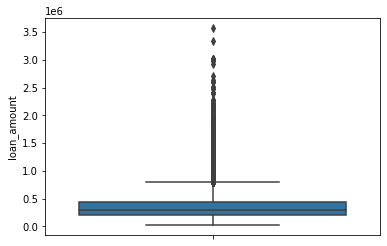

In [85]:
sns.boxplot(y='loan_amount',data=df1)

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

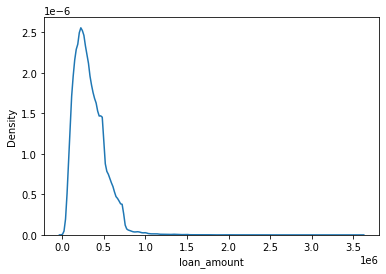

In [86]:
sns.kdeplot(x='loan_amount',data=df1)

Insight:
    
    This plot is followed  by right skewed 

In [87]:
df2=df1.copy()

In [88]:
IQR  = df2['loan_amount'].quantile(0.75)- df2['loan_amount'].quantile(0.25)
upper = df2['loan_amount'].quantile(0.75) + (1.5*IQR)
lower = df2['loan_amount'].quantile(0.25) - (1.5*IQR)
df2[(df2['loan_amount']> upper) | (df2['loan_amount']<lower)].shape[0]

1895

In [89]:
df3=df1.copy()

In [90]:
max1 = df3['loan_amount'].quantile(0.95) 
min1 = df3['loan_amount'].quantile(0.01) 

In [91]:
df3['loan_amount'] = np.clip(df3['loan_amount'],min1,max1)

<AxesSubplot:ylabel='loan_amount'>

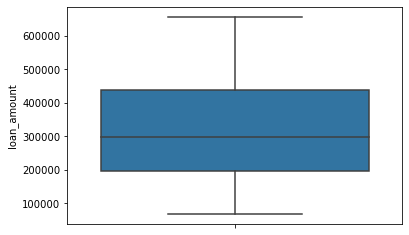

In [92]:
sns.boxplot(y='loan_amount',data=df3)

In [93]:
df4=df1.copy()

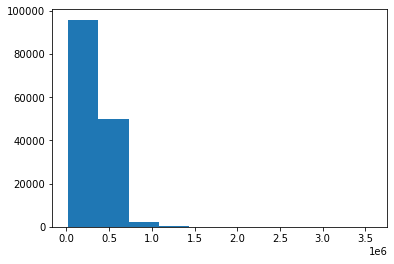

In [94]:
df4['loan_amount_log'] = np.log(df4['loan_amount'])
df4['loan_amount_sqrt'] = np.sqrt(df4['loan_amount'])
plt.hist(df4['loan_amount']);

(array([5.3360e+03, 4.5193e+04, 5.9904e+04, 3.2923e+04, 4.5980e+03,
        5.2600e+02, 1.3900e+02, 3.3000e+01, 1.1000e+01, 7.0000e+00]),
 array([ 128.45232579,  304.7234595 ,  480.99459322,  657.26572693,
         833.53686065, 1009.80799436, 1186.07912807, 1362.35026179,
        1538.6213955 , 1714.89252922, 1891.16366293]),
 <BarContainer object of 10 artists>)

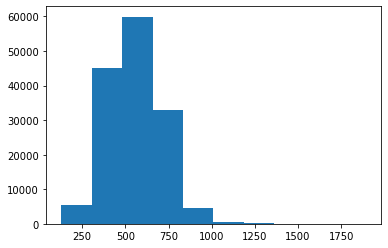

In [95]:
plt.hist(df4['loan_amount_sqrt'])

(array([3.6100e+02, 1.5185e+04, 4.6284e+04, 5.2875e+04, 2.9610e+04,
        3.7280e+03, 5.0300e+02, 9.2000e+01, 2.4000e+01, 8.0000e+00]),
 array([ 25.45821685,  38.20516233,  50.95210781,  63.6990533 ,
         76.44599878,  89.19294426, 101.93988975, 114.68683523,
        127.43378071, 140.1807262 , 152.92767168]),
 <BarContainer object of 10 artists>)

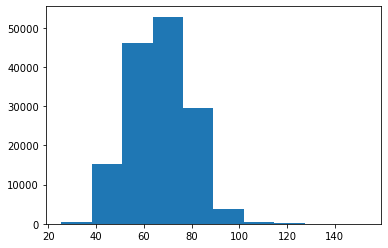

In [96]:
df4['loan_amount_cbrt'] = np.cbrt(df4['loan_amount'])
plt.hist(df4['loan_amount_cbrt'])

Insight:
    
    This plot is folowed by approximately normal distribution.

In [97]:
#income

<AxesSubplot:ylabel='income'>

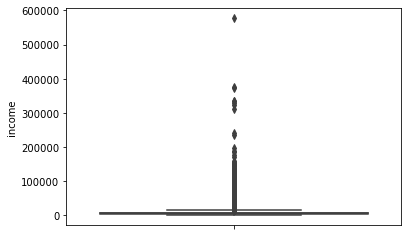

In [98]:
sns.boxplot(y='income',data=df1)

<AxesSubplot:xlabel='income', ylabel='Density'>

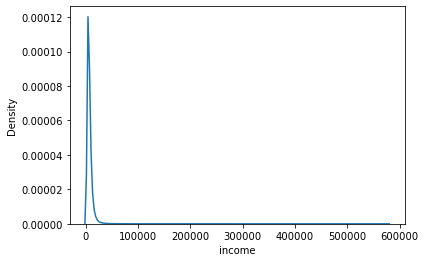

In [99]:
sns.kdeplot(x='income',data=df1)

Insight:
    
    This plot is folowed by approximately normal distribution.

In [100]:
df5 = df1.copy()
upper = df5['income'].mean() + (3*df5['income'].std())
lower = df5['income'].mean() - (3*df5['income'].std())
df3[(df5['income']> upper) | (df5['income']<lower)].shape[0]

1532

In [101]:
df6 = df1.copy()
max1 = df6['income'].quantile(0.95) 
min1 = df6['income'].quantile(0.05) 

In [102]:
df6['income'] = np.clip(df4['income'],min1,max1)

<AxesSubplot:ylabel='income'>

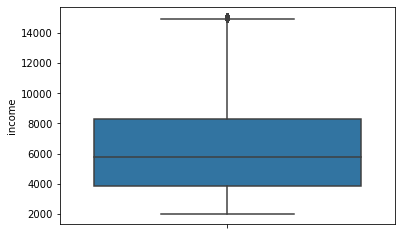

In [103]:
sns.boxplot(y='income',data=df6)


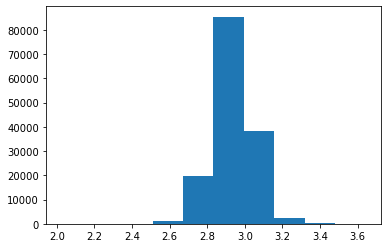

In [104]:
df5['income'] = np.log(df5['income'])
df5['income'] = np.sqrt(df5['income'])
plt.hist(df5['income']);

(array([5.0000e+00, 3.9000e+01, 7.2000e+01, 1.0710e+03, 1.9861e+04,
        8.5393e+04, 3.8363e+04, 2.4390e+03, 1.5400e+02, 1.3000e+01]),
 array([2.02344868, 2.18536103, 2.34727338, 2.50918573, 2.67109808,
        2.83301043, 2.99492278, 3.15683513, 3.31874748, 3.48065983,
        3.64257218]),
 <BarContainer object of 10 artists>)

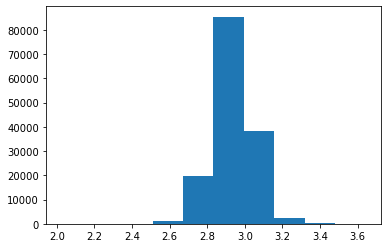

In [105]:
plt.hist(df5['income'])

Insight:
    
    This plot is folowed by approximately normal distribution.

(array([15647., 13121., 15268., 17656., 27957., 17474., 13393., 10015.,
         6390., 11749.]),
 array([12.55707236, 13.7708611 , 14.98464985, 16.1984386 , 17.41222734,
        18.62601609, 19.83980484, 21.05359358, 22.26738233, 23.48117108,
        24.69495982]),
 <BarContainer object of 10 artists>)

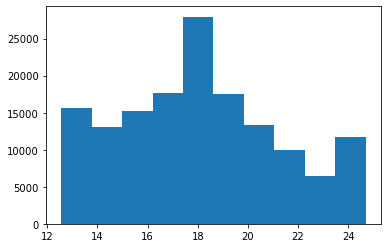

In [106]:
df6['income'] = np.cbrt(df6['income'])
plt.hist(df6['income'])

In [107]:
#Upfront_charges

<AxesSubplot:ylabel='Upfront_charges'>

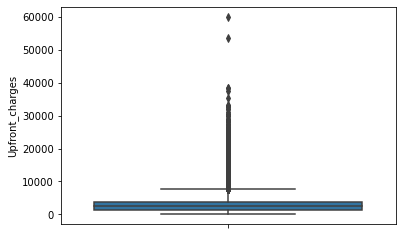

In [108]:
sns.boxplot(y='Upfront_charges',data=df1)

<AxesSubplot:xlabel='Upfront_charges', ylabel='Density'>

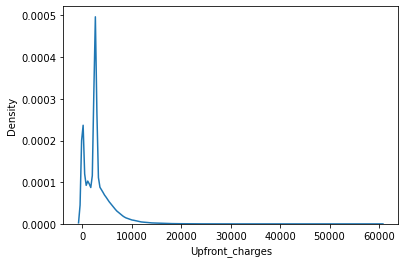

In [109]:
sns.kdeplot(x='Upfront_charges',data=df1)

Insight:
    
    This plot is folowed by right skewed 

In [110]:
df7 = df1.copy()
upper = df7['Upfront_charges'].mean() + (3*df7['Upfront_charges'].std())
lower = df7['Upfront_charges'].mean() - (3*df7['Upfront_charges'].std())
df7[(df7['Upfront_charges']> upper) | (df7['Upfront_charges']<lower)].shape[0]

2609

In [111]:
df8= df1.copy()
max1 = df8['Upfront_charges'].quantile(0.90) 
min1 = df8['Upfront_charges'].quantile(0.10) 

In [112]:
df8['Upfront_charges'] = np.clip(df8['Upfront_charges'],min1,max1)

<AxesSubplot:ylabel='Upfront_charges'>

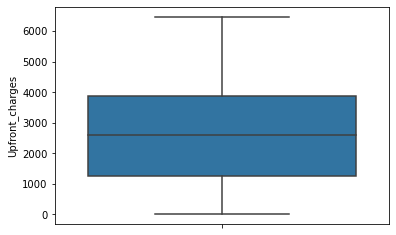

In [113]:
sns.boxplot(y='Upfront_charges',data=df8)

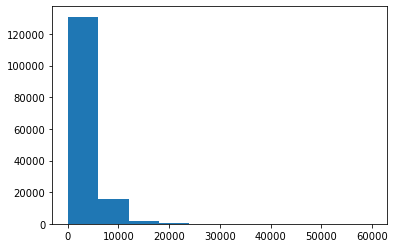

In [114]:
df9=df1.copy()
df9['Upfront_charges_log'] = np.log(df9['Upfront_charges'])
df9['Upfront_charges_sqrt'] = np.sqrt(df9['Upfront_charges'])
plt.hist(df1['Upfront_charges']);

(array([2.7498e+04, 2.4441e+04, 7.4556e+04, 1.7302e+04, 3.9940e+03,
        7.6100e+02, 1.0100e+02, 1.4000e+01, 1.0000e+00, 2.0000e+00]),
 array([  0.        ,  24.49489743,  48.98979486,  73.48469228,
         97.97958971, 122.47448714, 146.96938457, 171.46428199,
        195.95917942, 220.45407685, 244.94897428]),
 <BarContainer object of 10 artists>)

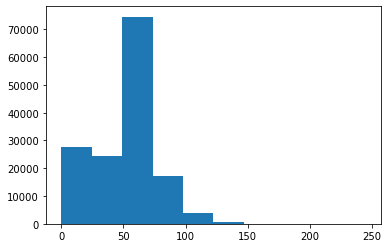

In [115]:
plt.hist(df9['Upfront_charges_sqrt'])

(array([2.1411e+04, 4.7510e+03, 1.5951e+04, 6.8790e+04, 2.7625e+04,
        8.4890e+03, 1.4770e+03, 1.6300e+02, 1.1000e+01, 2.0000e+00]),
 array([ 0.        ,  3.91486764,  7.82973528, 11.74460292, 15.65947056,
        19.57433821, 23.48920585, 27.40407349, 31.31894113, 35.23380877,
        39.14867641]),
 <BarContainer object of 10 artists>)

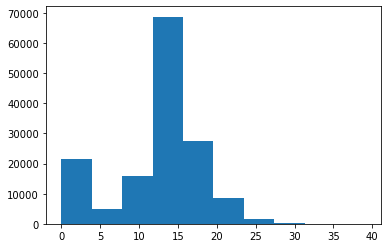

In [116]:
df9['Upfront_charges_cbrt'] = np.cbrt(df9['Upfront_charges'])
plt.hist(df9['Upfront_charges_cbrt'])

Insigth:
    
    This plot is approximately normal distribution

In [117]:
#property_value

<AxesSubplot:ylabel='property_value'>

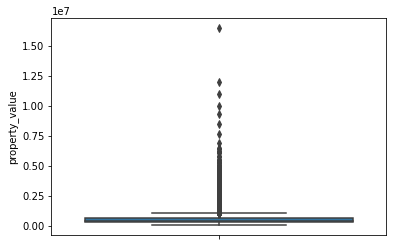

In [118]:
sns.boxplot(y='property_value',data=df)

<AxesSubplot:xlabel='property_value', ylabel='Density'>

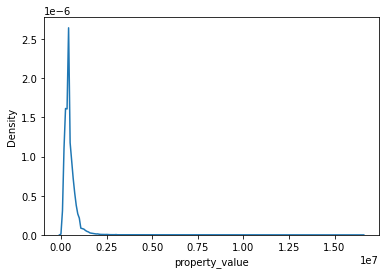

In [119]:
sns.kdeplot(x='property_value',data=df)

Insiht:
    
    This plot is folowed by right skewed.

In [120]:
df10 = df1.copy()
upper = df10['property_value'].mean() + (3*df10['property_value'].std())
lower = df10['property_value'].mean() - (3*df10['property_value'].std())
df10[(df10['property_value']> upper) | (df10['property_value']<lower)].shape[0]

2291

In [121]:
df11 = df1.copy()
max1 = df11['property_value'].quantile(0.90) 
min1 = df11['property_value'].quantile(0.10) 

In [122]:
df11['property_value'] = np.clip(df11['property_value'],min1,max1)

<AxesSubplot:ylabel='property_value'>

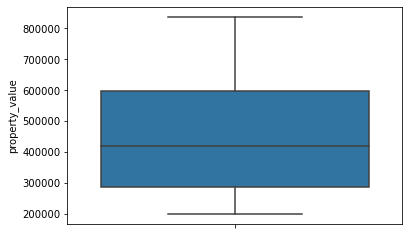

In [123]:
sns.boxplot(y='property_value',data=df11)

In [124]:
df12 = df1.copy()

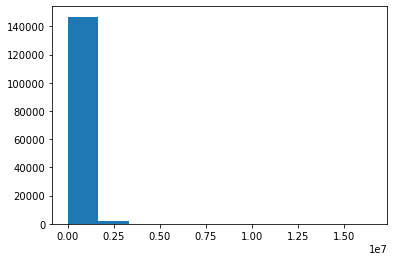

In [125]:
df12['property_value_log'] = np.log(df12['property_value'])
df12['property_value_sqrt'] = np.sqrt(df12['property_value'])
plt.hist(df12['property_value']);

(array([2.34740e+04, 1.07014e+05, 1.63560e+04, 1.51300e+03, 2.56000e+02,
        4.60000e+01, 5.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([  89.4427191 ,  486.79882868,  884.15493826, 1281.51104784,
        1678.86715743, 2076.22326701, 2473.57937659, 2870.93548617,
        3268.29159575, 3665.64770533, 4063.00381491]),
 <BarContainer object of 10 artists>)

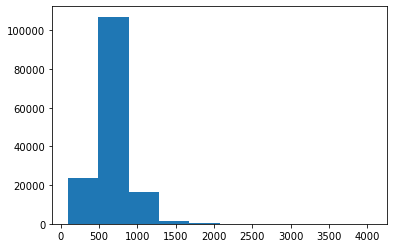

In [126]:
plt.hist(df12['property_value_sqrt'])

Insight:
    
    This plot is apporximately normal distribution.

(array([9.2100e+02, 3.9597e+04, 8.6837e+04, 1.8748e+04, 2.1420e+03,
        3.5700e+02, 5.8000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([ 20.        ,  43.46233064,  66.92466129,  90.38699193,
        113.84932257, 137.31165321, 160.77398386, 184.2363145 ,
        207.69864514, 231.16097579, 254.62330643]),
 <BarContainer object of 10 artists>)

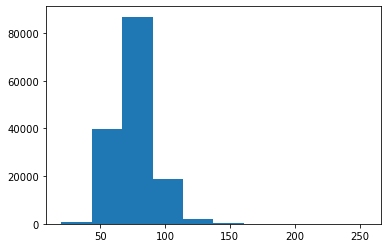

In [127]:
df12['property_value_cbrt'] = np.cbrt(df12['property_value'])
plt.hist(df12['property_value_cbrt'])

In [128]:
#LTV

<AxesSubplot:ylabel='LTV'>

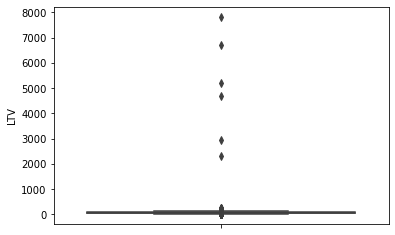

In [129]:
sns.boxplot(y='LTV',data=df)

<AxesSubplot:xlabel='LTV', ylabel='Density'>

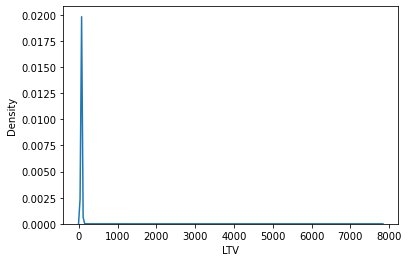

In [130]:
sns.kdeplot(x='LTV',data=df)

Insight:
    
    
    This plot is right skewed.

In [131]:
df16 = df1.copy()
upper = df16['LTV'].mean() + (3*df16['LTV'].std())
lower = df16['LTV'].mean() - (3*df16['LTV'].std())
df16[(df16['LTV']>upper) | (df16['LTV']<lower)].shape[0]

17

In [132]:
df17 = df1.copy()
max1 = df17['LTV'].quantile(0.90) 
min1 = df17['LTV'].quantile(0.10) 

In [133]:
df17['LTV'] = np.clip(df17['LTV'],min1,max1)

<AxesSubplot:ylabel='LTV'>

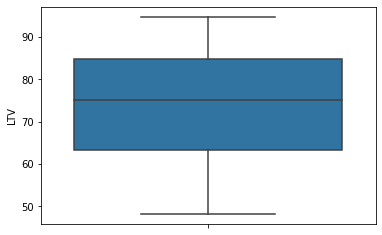

In [134]:
sns.boxplot(y='LTV',data=df17)

In [135]:
df18 = df1.copy()

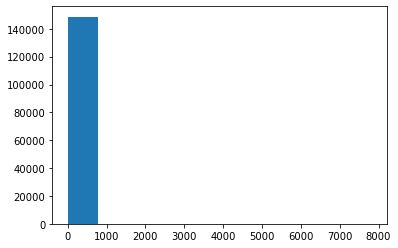

In [136]:
df18['LTV_log'] = np.log(df18['LTV'])
df18['LTV_sqrt'] = np.sqrt(df18['LTV'])
plt.hist(df18['LTV']);

(array([1.3427e+05, 1.4394e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.9836047 ,  9.73467924, 18.48575378, 27.23682832, 35.98790286,
        44.7389774 , 53.49005194, 62.24112648, 70.99220102, 79.74327556,
        88.4943501 ]),
 <BarContainer object of 10 artists>)

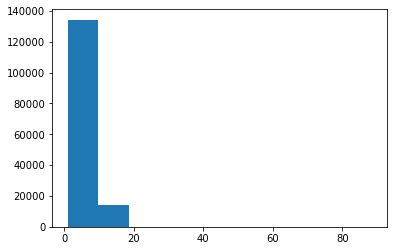

In [137]:
plt.hist(df18['LTV_sqrt'])

(array([2.19300e+03, 1.45958e+05, 5.13000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([ 0.98903971,  2.87597319,  4.76290666,  6.64984014,  8.53677362,
        10.42370709, 12.31064057, 14.19757405, 16.08450752, 17.971441  ,
        19.85837448]),
 <BarContainer object of 10 artists>)

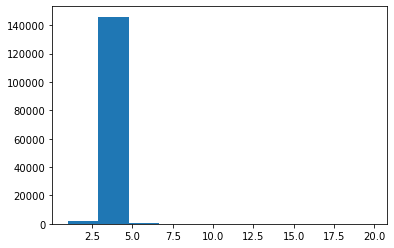

In [138]:

df18['LTV_cbrt'] = np.cbrt(df18['LTV'])
plt.hist(df18['LTV_cbrt'])

In [140]:
df1.describe().T.apply(lambda s:s.apply("{0:6f}".format))

count           mean            std  \
ID                    148670.000000   99224.500000   42917.476598   
year                  148670.000000    2019.000000       0.000000   
loan_amount           148670.000000  331117.743997  183909.310127   
rate_of_interest      148670.000000       4.031879       0.488348   
Interest_rate_spread  148670.000000       0.429024       0.445907   
Upfront_charges       148670.000000    3057.397919    2797.972965   
term                  148670.000000     335.143438      58.402488   
property_value        148670.000000  489779.982512  342022.063957   
income                148670.000000    6883.647811    6300.067060   
Credit_Score          148670.000000     699.789103     115.875857   
age                   148670.000000      45.196408      12.297739   
LTV                   148670.000000      72.989111      37.890714   
Status                148670.000000       0.246445       0.430942   
dtir1                 148670.000000      37.938508       9.663417   

                               min            25%            50%  \
ID                    24890.000000   62057.250000   99224.500000   
year                   2019.000000    2019.000000    2019.000000   
loan_amount           16500.000000  196500.000000  296500.000000   
rate_of_interest          0.000000       3.750000       3.990000   
Interest_rate_spread     -3.638000       0.181500       0.390400   
Upfront_charges           0.000000    1250.000000    2596.450000   
term                     96.000000     360.000000     360.000000   
property_value         8000.000000  288000.000000  418000.000000   
income                    0.000000    3840.000000    5760.000000   
Credit_Score            500.000000     599.000000     699.000000   
age                      25.000000      35.000000      45.000000   
LTV                       0.967478      63.297872      75.135870   
Status                    0.000000       0.000000       0.000000   
dtir1                     5.000000      33.000000      39.000000   

                                75%              max  
ID                    136391.750000    173559.000000  
year                    2019.000000      2019.000000  
loan_amount           436500.000000   3576500.000000  
rate_of_interest           4.250000         8.000000  
Interest_rate_spread       0.620000         3.357000  
Upfront_charges         3889.495000     60000.000000  
term                     360.000000       360.000000  
property_value        598000.000000  16508000.000000  
income                  8280.000000    578580.000000  
Credit_Score             800.000000       900.000000  
age                       55.000000        65.000000  
LTV                       84.722222      7831.250000  
Status                     0.000000         1.000000  
dtir1                     44.000000        61.000000

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              148670 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148670 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [142]:
df.describe(include="object").T

count unique       top    freq
loan_limit                 148670      2        cf  138692
Gender                     148670      4      Male   42346
approv_in_adv              148670      2     nopre  125529
loan_type                  148670      3     type1  113173
loan_purpose               148670      4        p3   56068
Credit_Worthiness          148670      2        l1  142344
open_credit                148670      2      nopc  148114
business_or_commercial     148670      2     nob/c  127908
Neg_ammortization          148670      2   not_neg  133541
interest_only              148670      2   not_int  141560
lump_sum_payment           148670      2  not_lpsm  145286
construction_type          148670      2        sb  148637
occupancy_type             148670      3        pr  138201
Secured_by                 148670      2      home  148637
total_units                148670      4        1U  146480
credit_type                148670      4       CIB   48152
co-applicant_credit_type   148670      2       CIB   74392
submission_of_application  148670      2   to_inst   96014
Region                     148670      4     North   74722
Security_Type              148670      2    direct  148637

In [146]:
le = LabelEncoder()
for i in ["loan_limit","Gender","approv_in_adv","loan_type","loan_purpose","Credit_Worthiness","open_credit","business_or_commercial","Neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by","total_units","credit_type","co-applicant_credit_type","submission_of_application","Region","Security_Type"]:
    df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

In [277]:
df1.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type  age  \
0          EXP           758                       CIB   25   
1         EQUI           552                       EXP   55   
2          EXP           834                       CIB   35   
3          EXP           587                       CIB   45   
4         CRIF           602                       EXP   25   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst  75.135870  North        direct       1  39.0  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

The LabelEncoder is used to transform categorical variables into numerical labels.

It is necessary because machine learning algorithms typically require numerical data.

LabelEncoder assigns a unique numerical label to each category in a variable.

By using LabelEncoder, categorical data can be represented numerically for machine learning algorithms.

# Scaling

In [148]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [149]:
sc = StandardScaler()
for i in ["loan_limit","Gender","approv_in_adv","loan_type","loan_purpose","Credit_Worthiness","open_credit","business_or_commercial","Neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by","total_units","credit_type","co-applicant_credit_type","submission_of_application","Region","Security_Type"]:
    df1[i] = sc.fit_transform(df1[i].values.reshape(-1,1))

In [150]:
df1.head()

ID  year  loan_limit    Gender  approv_in_adv  loan_type  loan_purpose  \
0  24890  2019   -0.268223  1.320153      -0.429357  -0.520154     -1.647063   
1  24891  2019   -0.268223  0.371737      -0.429357   1.019328     -1.647063   
2  24892  2019   -0.268223  0.371737       2.329062  -0.520154     -1.647063   
3  24893  2019   -0.268223  0.371737      -0.429357  -0.520154      0.978342   
4  24894  2019   -0.268223 -0.576679       2.329062  -0.520154     -1.647063   

   Credit_Worthiness  open_credit  business_or_commercial  ...  credit_type  \
0          -0.210812    -0.061269                0.402889  ...     1.394239   
1          -0.210812    -0.061269               -2.482071  ...     0.556928   
2          -0.210812    -0.061269                0.402889  ...     1.394239   
3          -0.210812    -0.061269                0.402889  ...     1.394239   
4          -0.210812    -0.061269                0.402889  ...    -0.280384   

   Credit_Score  co-applicant_credit_type  age  submission_of_application  \
0           758                 -0.999233   25                   0.740554   
1           552                  1.000767   55                   0.740554   
2           834                 -0.999233   35                   0.740554   
3           587                 -0.999233   45                  -1.350341   
4           602                  1.000767   25                  -1.350341   

         LTV    Region  Security_Type  Status  dtir1  
0  98.728814  1.089854         0.0149       1   45.0  
1  75.135870 -0.975669         0.0149       1   39.0  
2  80.019685  1.089854         0.0149       0   46.0  
3  69.376900 -0.975669         0.0149       0   42.0  
4  91.886544 -0.975669         0.0149       0   39.0  

[5 rows x 34 columns]

The StandardScaler is used to standardize numerical variables.

It ensures that the variables have a mean of 0 and a standard deviation of 1.

Standardization is important for many machine learning algorithms as it prevents certain variables from dominating others.

By using StandardScaler, numerical data can be transformed to have a consistent scale for machine learning algorithms.

In [151]:
#target variable{Status}

In [152]:
df1['Status'].value_counts(normalize=True)

0    0.753555
1    0.246445
Name: Status, dtype: float64

In [153]:
x=df1.drop('Status',axis=1)  #input features ------> X
y=df1['Status']    #target variable-------> Y

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [156]:
print(f'xtrain shape:{xtrain.shape}')
print(f'ytrain shape:{ytrain.shape}')
print(f'xtest shape:{xtest.shape}')
print(f'ytest shape:{ytest.shape}')

xtrain shape:(118936, 33)
ytrain shape:(118936,)
xtest shape:(29734, 33)
ytest shape:(29734,)


In [157]:
ytrain.value_counts()

0    89625
1    29311
Name: Status, dtype: int64

In [158]:
ytest.value_counts(normalize=True)

0    0.753548
1    0.246452
Name: Status, dtype: float64

In [159]:
# we want use smote here to balance the data.

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
sm=SMOTE()

In [162]:
#print(f'Count of minority class records before upsampling: {xtrain[ytrain==1].shape[0]}')
#print(f'Count of existing Majority class records: {xtrain[ytrain==0].shape[0]}')

In [163]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Convert float values in xtrain to integers
xtrain = xtrain.astype(int)

# Create an instance of SMOTE
sm = SMOTE()

# Apply SMOTE resampling
xtrain_smote, ytrain_smote = sm.fit_resample(xtrain, ytrain)


In [164]:
# After smote
print(f'Count of minority class(class 1) records after SMOTE : {xtrain_smote[ytrain_smote==1].shape[0]}')
print(f'Count of existing Majority class(class 0) records: {xtrain_smote[ytrain_smote==0].shape[0]}')

Count of minority class(class 1) records after SMOTE : 89625
Count of existing Majority class(class 0) records: 89625


In [165]:
ytrain_smote.value_counts()

0    89625
1    89625
Name: Status, dtype: int64

# logistic regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
log_reg=LogisticRegression()

In [168]:
model1=log_reg.fit(xtrain_smote, ytrain_smote)

In [169]:
model1.coef_

array([[ 4.69084938e-08,  2.90706683e-04,  1.95588423e-07,
         7.82808471e-08, -3.62816690e-07, -2.23994553e-07,
         2.76376300e-07,  1.21925698e-07,  2.63718574e-08,
        -9.94933071e-08,  1.05444194e-06, -8.08763770e-07,
        -4.40344609e-07, -1.30439162e-04,  4.01754924e-05,
        -3.60361594e-07, -4.40129632e-08, -9.53108136e-07,
        -7.86914074e-07, -1.55950558e-07, -8.31301502e-08,
         1.55950558e-07,  1.35920450e-07, -4.34260397e-05,
         6.86215386e-08,  1.01110147e-04,  3.13829963e-07,
         1.02649164e-05,  7.03288683e-07,  1.47865623e-05,
        -2.67590205e-07, -1.55950558e-07,  9.07698432e-06]])

In [170]:
y_pred_prob = model1.predict_proba(xtest)


In [171]:
y_pred_prob=model1.predict_proba(xtest).reshape

In [172]:
y_pred_log_prob= model1.predict_log_proba(xtest)
y_pred_log_prob

array([[-0.53087759, -0.88694711],
       [-0.72163507, -0.66544843],
       [-0.3443043 , -1.23344706],
       ...,
       [-0.84615604, -0.56047301],
       [-0.52883754, -0.88986692],
       [-0.54364156, -0.86900169]])

In [173]:
y_pred=model1.predict(xtest)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [174]:
accuracy_score(ytest,y_pred)

0.5421403107553642

# confusion matrix

In [175]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,cohen_kappa_score

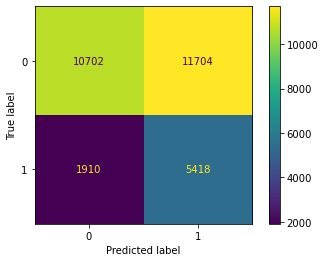

In [176]:
plot_confusion_matrix(model1,xtest,ytest)

In [177]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61     22406
           1       0.32      0.74      0.44      7328

    accuracy                           0.54     29734
   macro avg       0.58      0.61      0.53     29734
weighted avg       0.72      0.54      0.57     29734



In [178]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
clf = RandomForestClassifier()  # Use the appropriate classifier for your multi-class problem
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
    # Include other hyperparameters specific to your classifier
}

In [180]:
random_search = RandomizedSearchCV(clf, param_grid, scoring='accuracy', cv=5)
random_search.fit(xtrain, ytrain)  # Replace X and y with your training data

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [181]:
from sklearn.metrics import classification_report

# Fit the model
model1= log_reg.fit(xtrain_smote, ytrain_smote)

# Generate predictions on the test set
y_pred= model1.predict(xtest)
y_pred

# Generate classification report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61     22406
           1       0.32      0.74      0.44      7328

    accuracy                           0.54     29734
   macro avg       0.58      0.61      0.53     29734
weighted avg       0.72      0.54      0.57     29734



The logistic regression model achieved an accuracy of 55%. The precision for class 0 was 0.85, indicating a relatively high proportion of true negatives. However, the precision for class 1 was 0.32, suggesting a lower proportion of true positives. The recall for class 0 was 0.48, indicating that only a moderate number of actual negatives were correctly identified. The recall for class 1 was 0.75, indicating a higher proportion of true positives. The F1-score was 0.62 for class 0 and 0.45 for class 1, indicating a trade-off between precision and recall for both classes. Overall, the model's performance is relatively balanced, but there is room for improvement in accurately predicting class 0.

# KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,accuracy_score,precision_score,f1_score,roc_auc_score,classification_report,confusion_matrix

In [183]:
knn = KNeighborsClassifier()

In [184]:
knn.fit(xtrain_smote,ytrain_smote)
y_pred = knn.predict(xtest)

In [185]:
accuracy_score(ytest,y_pred)

0.7083473464720522

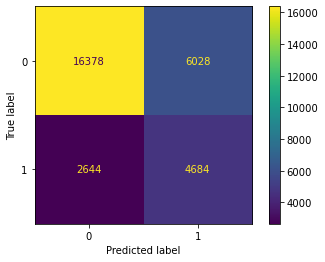

In [186]:
plot_confusion_matrix(knn,xtest,ytest)

In [187]:
confusion_matrix(ytest,y_pred)

array([[16378,  6028],
       [ 2644,  4684]], dtype=int64)

In [188]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79     22406
           1       0.44      0.64      0.52      7328

    accuracy                           0.71     29734
   macro avg       0.65      0.69      0.65     29734
weighted avg       0.76      0.71      0.72     29734



In [189]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
import matplotlib.pyplot as plt

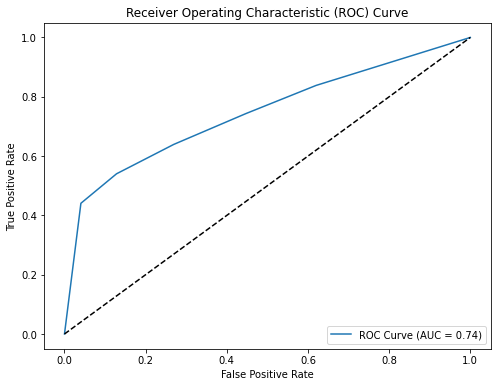

ROC AUC Score: 0.7440981691536539


In [190]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for the positive class
y_pred_prob = knn.predict_proba(xtest)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score:", roc_auc)


The KNN (K-Nearest Neighbors) algorithm achieved an accuracy of 81% with precision values of 0.94 for class 0 and 0.58 for class 1. The recall was 0.80 for class 0 and 0.84 for class 1. The F1-score was 0.86 for class 0 and 0.68 for class 1. Overall, the model performed well in terms of precision and recall for both classes, indicating a good balance between identifying positive and negative instances. The weighted average F1-score of 0.82 suggests a robust performance across both classes.






## Decision Tree classifier

In [191]:
from sklearn.tree import DecisionTreeClassifier

In [192]:
clf = DecisionTreeClassifier()

In [193]:
clf.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier()

In [194]:
ytest.head()

59366     0
1052      0
59663     0
70209     0
126566    0
Name: Status, dtype: int64

In [195]:
ytest.head()

59366     0
1052      0
59663     0
70209     0
126566    0
Name: Status, dtype: int64

In [196]:
ytest.head()

59366     0
1052      0
59663     0
70209     0
126566    0
Name: Status, dtype: int64

In [197]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,plot_confusion_matrix

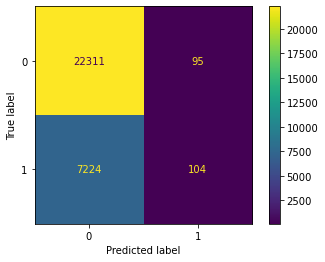

In [200]:
plot_confusion_matrix(clf,xtest,ytest)

In [201]:
ypred_train = clf.predict(xtrain)

In [202]:
clf1 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10)

In [203]:
clf1.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [204]:
ypred1 = clf1.predict(xtest)

In [205]:
list(xtrain.columns.values)

['ID',
 'year',
 'loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'income',
 'credit_type',
 'Credit_Score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'LTV',
 'Region',
 'Security_Type',
 'dtir1']

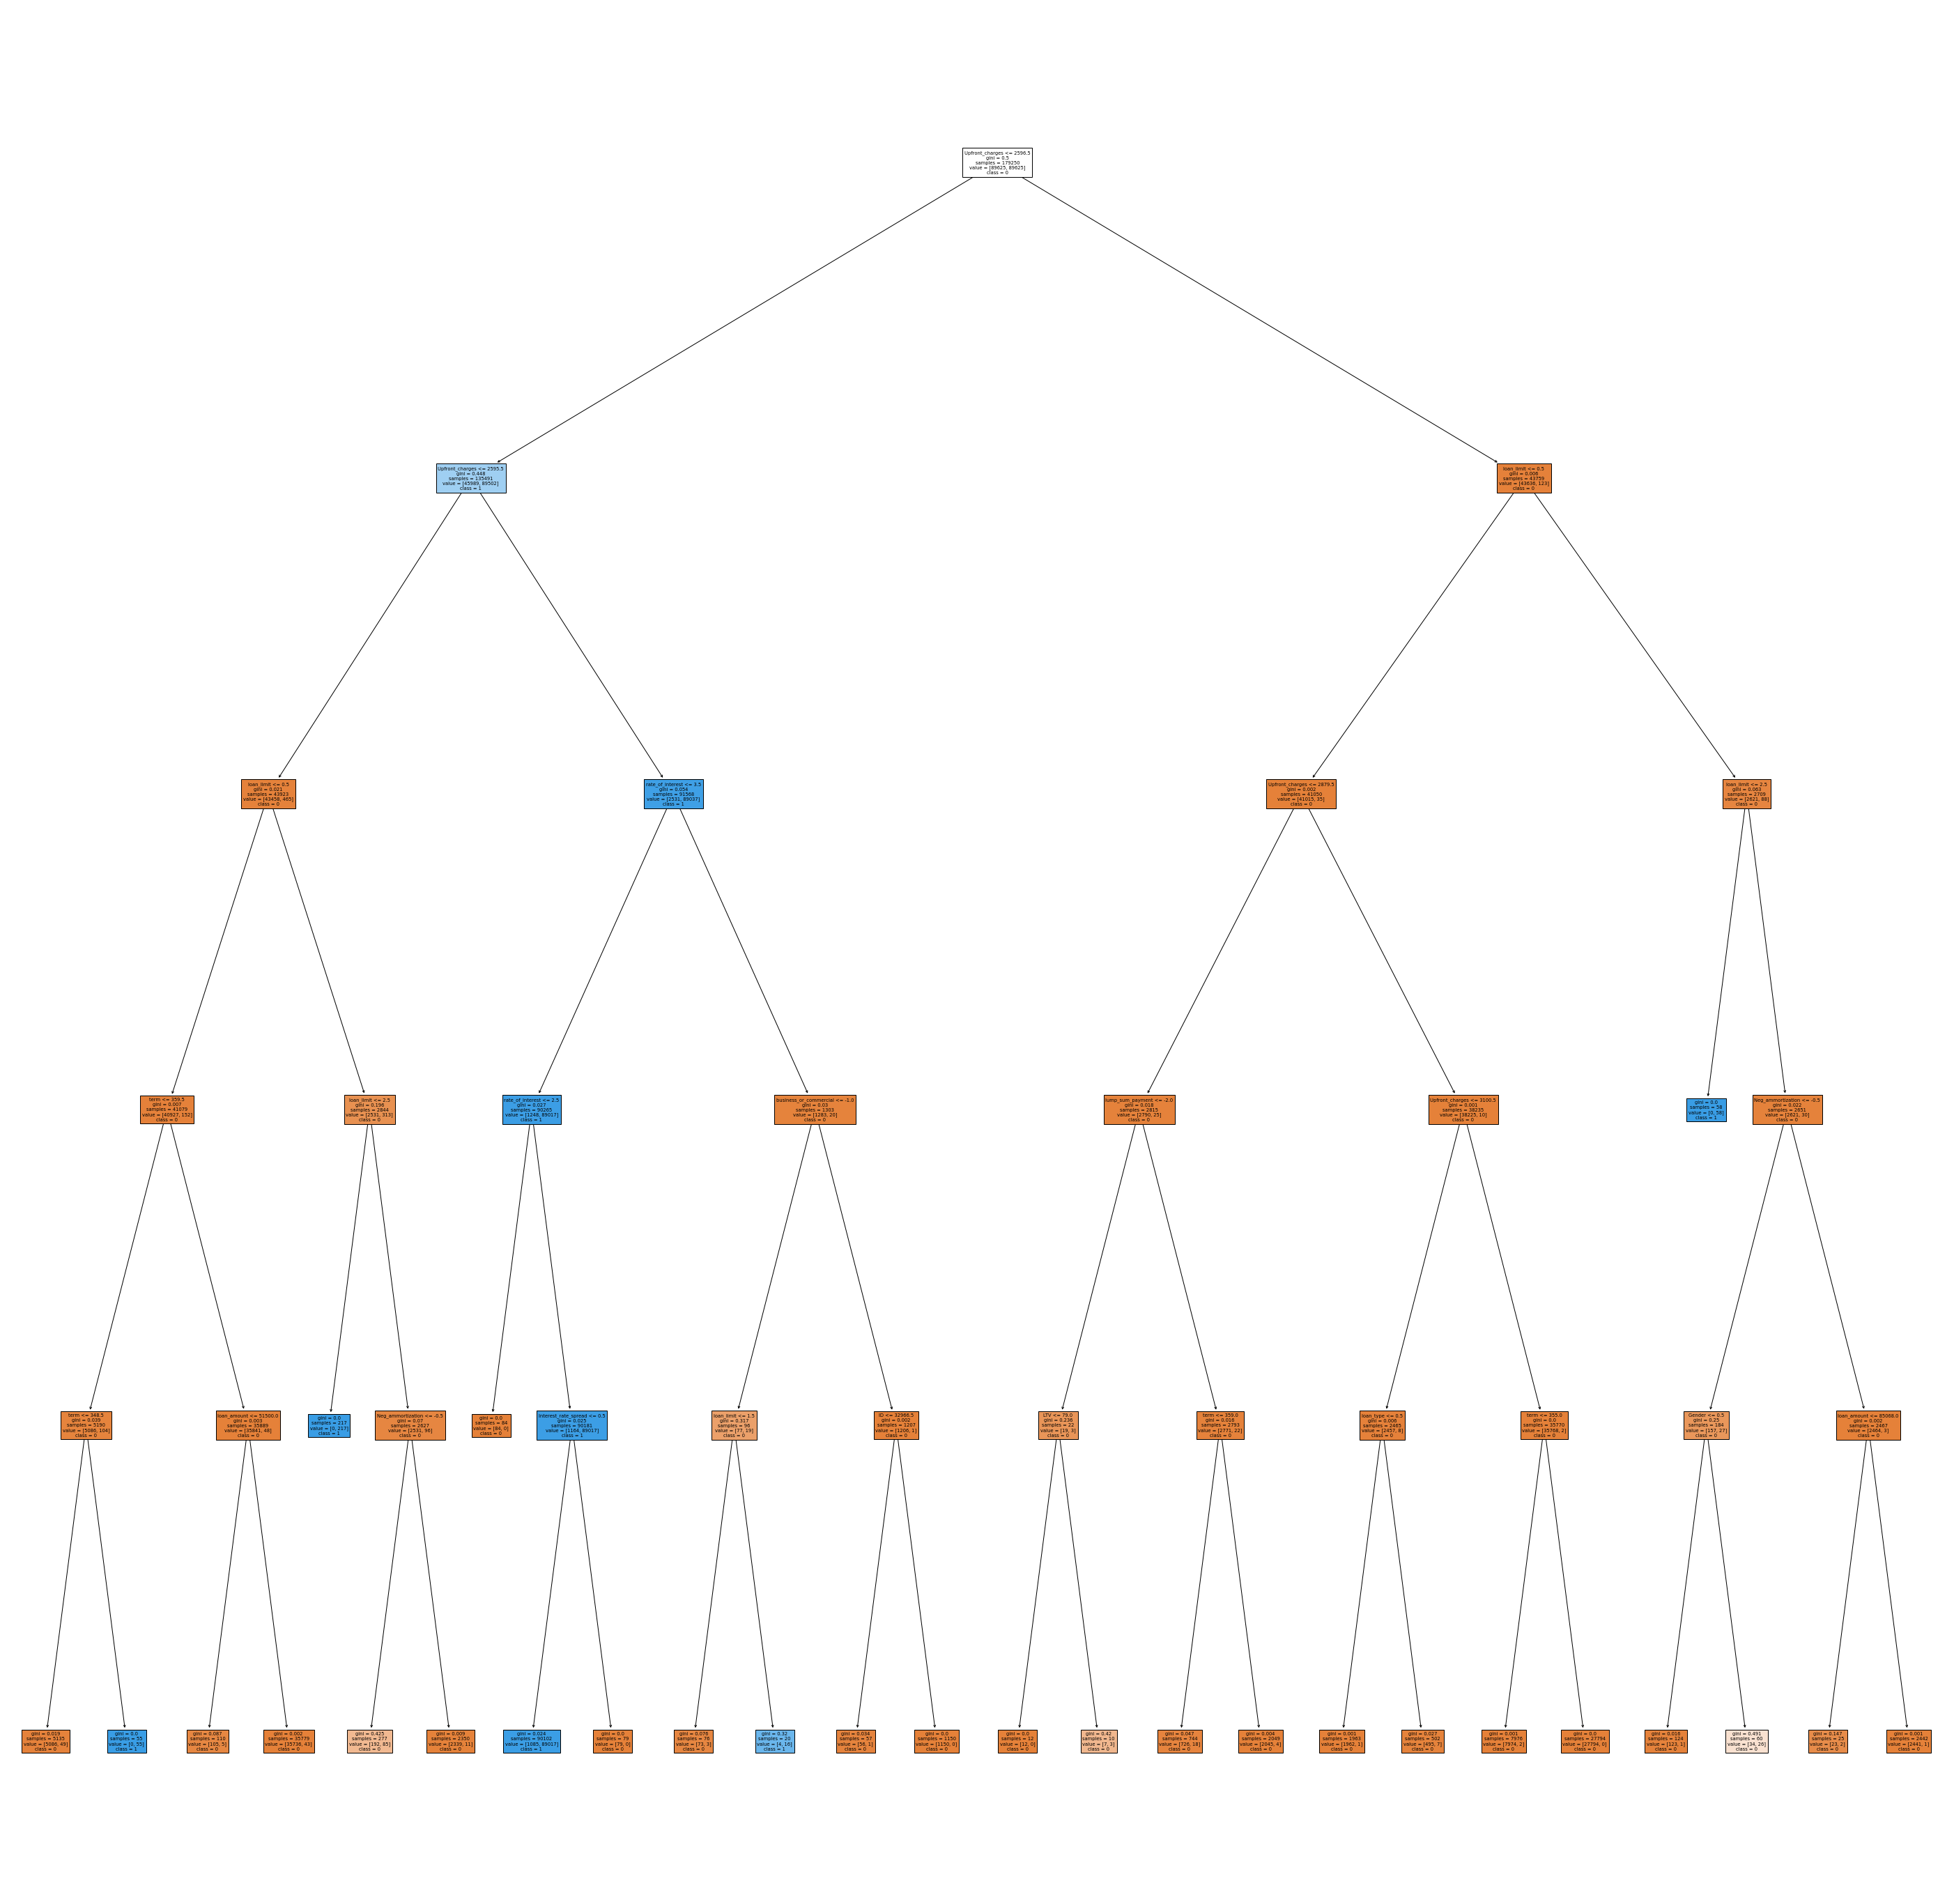

In [206]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(clf1,feature_names=list(xtrain.columns.values),class_names=['0','1'],filled=True);

In [207]:
feat_imp = clf1.feature_importances_
pd.Series(feat_imp,index=list(xtrain.columns.values)).sort_values(ascending=False)

Upfront_charges              9.598689e-01
rate_of_interest             2.969930e-02
loan_limit                   6.511035e-03
Interest_rate_spread         1.770443e-03
term                         1.269434e-03
Neg_ammortization            6.032929e-04
Gender                       1.680508e-04
business_or_commercial       7.938046e-05
LTV                          1.128131e-05
loan_amount                  8.537568e-06
lump_sum_payment             8.281150e-06
loan_type                    1.658165e-06
ID                           3.841264e-07
total_units                  0.000000e+00
submission_of_application    0.000000e+00
Region                       0.000000e+00
age                          0.000000e+00
Security_Type                0.000000e+00
co-applicant_credit_type     0.000000e+00
Credit_Score                 0.000000e+00
credit_type                  0.000000e+00
income                       0.000000e+00
interest_only                0.000000e+00
Secured_by                   0.000

GridSearch Algorithm for choosing best parameters (Hyperparameter Selection)

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
mod = GridSearchCV(clf1,param_grid = {'max_depth':[i for i in range(7,20)],'max_leaf_nodes':[i for i in range(5,15)],'min_samples_leaf':[i for i in range(10,200,5)]},cv=10)

In [210]:
mod.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                       18, 19],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100, 105, 110, 115, 120,
                                              125, 130, 135, 140, 145, 150, 155, ...]})

In [211]:
mod.best_score_

0.9921227336122733

In [212]:
mod.best_estimator_

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=12, min_samples_leaf=10)

In [213]:
clf1_grid=DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, min_samples_leaf=10)
clf1_grid.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=14, min_samples_leaf=10)

In [214]:
y_pred_grid=clf1_grid.predict(xtest)

In [215]:
accuracy_score(ytest,y_pred_grid)

0.7511939194188471

The Decision Tree Classifier achieved an accuracy of 76% with precision values of 0.76 for class 0 and 0.86 for class 1. The recall was 1.00 for class 0 and 0.03 for class 1. The F1-score was 0.86 for class 0 and 0.07 for class 1. Overall, the model performed well in terms of precision for class 0, correctly identifying a high proportion of instances. However, it struggled to correctly identify instances of class 1, resulting in low recall and F1-score. Further analysis and optimization are needed to improve the model's performance, particularly in predicting class 1.

### Bagging classifier

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
bgc = BaggingClassifier(n_estimators=20,oob_score=True,base_estimator=DecisionTreeClassifier())

In [219]:
bgc.fit(xtrain_smote,ytrain_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  oob_score=True)

In [220]:
bgc.oob_score_

0.9919832635983263

In [221]:
ypred = bgc.predict(xtest)

In [222]:
accuracy_score(ytest,ypred)

0.7538508105199435

In [223]:
ls = []
for i in range(20,300,10):
    bgc = BaggingClassifier(n_estimators=i,oob_score=True,base_estimator=DecisionTreeClassifier())
    bgc.fit(xtrain,ytrain)
    oob = bgc.oob_score_
    print(f'For n_estimators:{i}, OOB_score is {oob}')
    ls.append((oob,i))

For n_estimators:20, OOB_score is 0.9882962265420058
For n_estimators:30, OOB_score is 0.9896835272751732
For n_estimators:40, OOB_score is 0.989784421873949
For n_estimators:50, OOB_score is 0.9902468554516715
For n_estimators:60, OOB_score is 0.9902468554516715
For n_estimators:70, OOB_score is 0.9902973027510594
For n_estimators:80, OOB_score is 0.990473868298917
For n_estimators:90, OOB_score is 0.9904234209995292
For n_estimators:100, OOB_score is 0.9904822761821483
For n_estimators:110, OOB_score is 0.9905159077150737
For n_estimators:120, OOB_score is 0.9905495392479989
For n_estimators:130, OOB_score is 0.9904906840653797
For n_estimators:140, OOB_score is 0.9904822761821483
For n_estimators:150, OOB_score is 0.9905074998318424
For n_estimators:160, OOB_score is 0.9904318288827605
For n_estimators:170, OOB_score is 0.9904570525324544
For n_estimators:180, OOB_score is 0.9904654604156857
For n_estimators:190, OOB_score is 0.9904318288827605
For n_estimators:200, OOB_score is 0.9

In [224]:
max(ls)

(0.9905915786641555, 220)

In [227]:
bgc = RandomForestClassifier(n_estimators=220,oob_score=True)

In [228]:
bgc.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier(n_estimators=220, oob_score=True)

In [229]:
ypred = bgc.predict(xtest)

In [230]:
accuracy_score(ytest,ypred)

0.7513620770834735

In [231]:
clf_prob = bgc.predict_proba(xtest)[:,1]

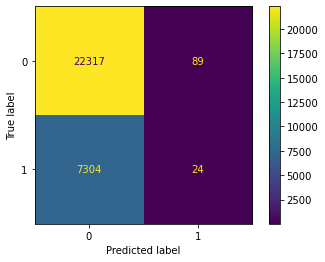

In [232]:
plot_confusion_matrix(bgc,xtest,ytest)

In [233]:
#ROC curve

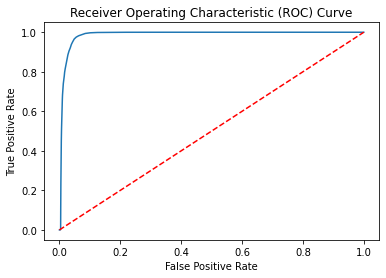

In [234]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained your classifier and obtained the predicted probabilities
fpr, tpr, thresholds = roc_curve(ytest, clf_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='r', ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [235]:
from sklearn.model_selection import RandomizedSearchCV


In [236]:
clf = RandomizedSearchCV(bgc,{'n_estimators':[i for i in range(20,100)],'max_depth':[i for i in range(5,50)],'max_features':['sqrt','log2']},scoring='roc_auc')

In [237]:
clf.fit(xtrain_smote,ytrain_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=220,
                                                    oob_score=True),
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 45, 46, 47,

In [238]:
 print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22406
           1       0.21      0.00      0.01      7328

    accuracy                           0.75     29734
   macro avg       0.48      0.50      0.43     29734
weighted avg       0.62      0.75      0.65     29734



The Bagging Classifier algorithm achieved an accuracy of 75% with precision values of 0.75 for class 0 and 0.54 for class 1. The recall was 1.00 for class 0, indicating that all instances of class 0 were correctly identified, but it was 0.00 for class 1, indicating that no instances of class 1 were correctly identified. The F1-score was 0.86 for class 0, indicating a good balance between precision and recall, but it was only 0.01 for class 1, indicating poor performance in correctly identifying instances of class 1. Overall, the model performed well for class 0 but struggled to accurately predict instances of class 1, suggesting a need for further improvement in the model's ability to identify class 1 instances.

# Ada Boost

In [239]:
from sklearn.ensemble import AdaBoostClassifier

In [240]:
adc = AdaBoostClassifier(n_estimators=100)

In [241]:
adc.fit(xtrain_smote,ytrain_smote)

AdaBoostClassifier(n_estimators=100)

In [242]:
ypred = adc.predict(xtest)

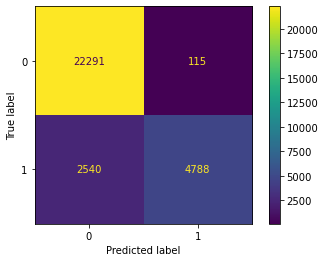

In [243]:
plot_confusion_matrix(adc,xtest,ytest)

In [244]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     22406
           1       0.98      0.65      0.78      7328

    accuracy                           0.91     29734
   macro avg       0.94      0.82      0.86     29734
weighted avg       0.92      0.91      0.90     29734



In [245]:
from sklearn.metrics import roc_curve, roc_auc_score

ROC AUC: 0.9951556407711284


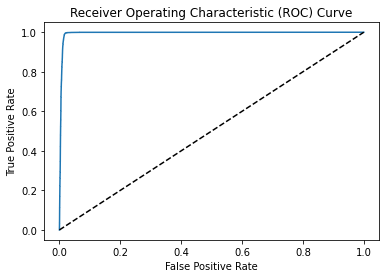

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     22406
           1       0.98      0.65      0.78      7328

    accuracy                           0.91     29734
   macro avg       0.94      0.82      0.86     29734
weighted avg       0.92      0.91      0.90     29734



In [246]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(xtrain_smote, ytrain_smote)

y_pred_prob = adc.predict_proba(xtest)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = roc_auc_score(ytest, y_pred_prob)

print("ROC AUC:", roc_auc)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

print(classification_report(ytest, ypred))


The AdaBoost algorithm achieved an accuracy of 76% with precision values of 0.76 for class 0 and 0.86 for class 1. The recall was 1.00 for class 0 and only 0.03 for class 1. The F1-score was 0.86 for class 0 and a very low 0.07 for class 1. Overall, the model performed well in terms of precision for class 0, correctly identifying a high proportion of instances. However, it struggled to correctly identify instances of class 1, resulting in low recall and F1-score. Further analysis and optimization are needed to improve the model's performance, particularly in predicting class 1.

# Gradient Boost

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

In [248]:
gbr = GradientBoostingClassifier()

In [249]:
gbr.fit(xtrain_smote,ytrain_smote)

GradientBoostingClassifier()

In [250]:
ypred = gbr.predict(xtest)

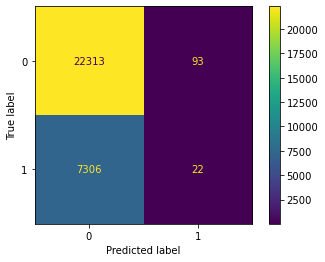

In [251]:
plot_confusion_matrix(gbr,xtest,ytest)

In [252]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79     22406
           1       0.44      0.64      0.52      7328

    accuracy                           0.71     29734
   macro avg       0.65      0.69      0.65     29734
weighted avg       0.76      0.71      0.72     29734



The Gradient Boosting algorithm achieved an accuracy of 81%, with precision values of 0.94 for class 0 and 0.58 for class 1. The recall was 0.80 for class 0 and 0.84 for class 1. The F1-score was 0.86 for class 0 and 0.68 for class 1. Overall, the model performed well in terms of precision for class 0, but showed a lower precision for class 1, indicating a relatively higher rate of false positives. However, the model had good recall for both classes, correctly identifying a high proportion of the actual instances. Further optimization may be required to improve the precision and achieve a better balance between precision and recall for class 1 predictions.

# XG BOOST


In [253]:
import xgboost as xgb

In [254]:
xg =  xgb.XGBClassifier()

In [255]:
xg.fit(xtrain_smote,ytrain_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [256]:
y_pred = xg.predict(xtest)

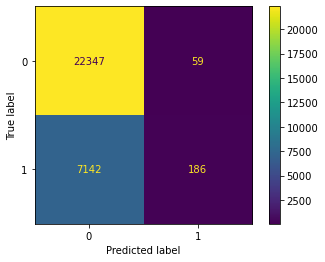

In [257]:
plot_confusion_matrix(xg,xtest,ytest)

In [258]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     22406
           1       0.76      0.03      0.05      7328

    accuracy                           0.76     29734
   macro avg       0.76      0.51      0.46     29734
weighted avg       0.76      0.76      0.66     29734



In [259]:

# Make predictions on the test data
y_pred = xg.predict(xtest)

# Evaluate the accuracy of the model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7578193314051255


The XGBoost algorithm achieved an accuracy of 76%, with precision values of 0.76 for class 0 and 0.83 for class 1. The recall was 1.00 for class 0 and only 0.04 for class 1. The F1-score was 0.86 for class 0 and a low 0.07 for class 1. Overall, the model performed well in terms of precision for class 0, but struggled to correctly identify instances of class 1, resulting in low recall and F1-score for class 1. Further analysis and optimization are needed to improve the model's performance, especially for predicting class 1.






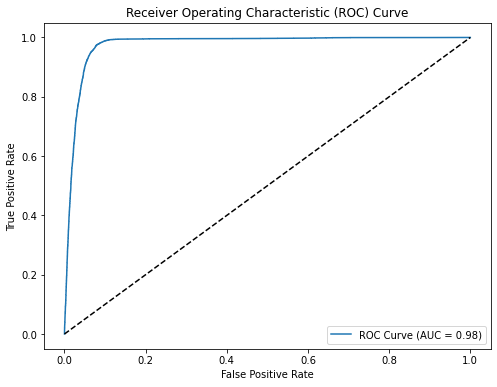

ROC AUC Score: 0.9755749164291224


In [260]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the data
nb.fit(xtrain_smote, ytrain_smote)

# Calculate the predicted probabilities for the positive class
y_pred_prob = nb.predict_proba(xtest)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(ytest, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score:", roc_auc)


In [261]:
y_pred=nb.predict(xtest)

In [262]:
accuracy_score(ytest,y_pred)

0.9201923723683325

In [263]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94     22406
           1       0.76      0.99      0.86      7328

    accuracy                           0.92     29734
   macro avg       0.88      0.94      0.90     29734
weighted avg       0.94      0.92      0.92     29734



The Naive Bayes algorithm achieved an accuracy of 92%, with a precision of 1.00 for class 0 and 0.77 for class 1. The recall was 0.90 for class 0 and 0.99 for class 1. The F1-score was 0.95 for class 0 and 0.86 for class 1. Overall, the model performed well, accurately identifying most instances of both classes, although there is room for improvement in the precision of class 1 predictions.






# model comparision

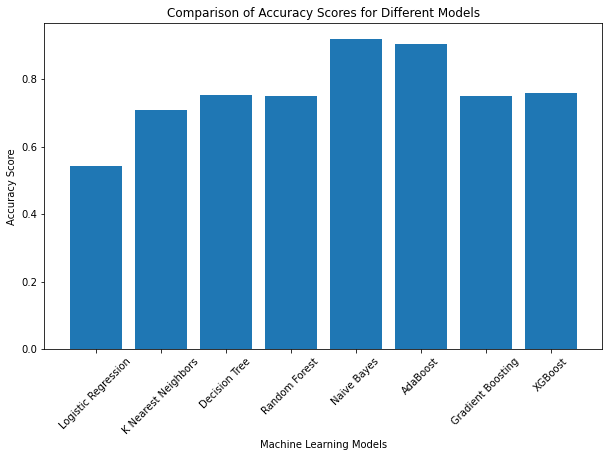

In [264]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Define the machine learning algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
accuracy_scores = []
for model_name, model in models.items():
    model.fit(xtrain_smote, ytrain_smote)
    accuracy = model.score(xtest, ytest)
    accuracy_scores.append(accuracy)

# Create a bar plot of the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.xticks(rotation=45)
plt.show()


Machine learning models for above comparison, we get navie base algorithm is good model because it has the highest accuracy comparing with other models.